![booking](./img/bookingcom.png)

# Mining Tweets of `@Bookingcom`

Booking.com is an online travel agency for making reservations of hotels, accommodations and stays. It is one of the most popular travel agency, competing closely with Airbnb. It's popularity grew in the recent years. It is owned and operated by and is the primary revenue source of United States-based Booking Holdings and is headquartered in Amsterdam.
Website: [booking.com](https://www.booking.com/)

As a group assignment, we decided to mine the tweets of [@bookingcom](https://twitter.com/bookingcom) using the free version of Twitter's API. Several Twitter Accounts were used as a workaround of the limmitations of the `free API access` in order to retrieve as many tweets as possible.

Note: Booking.com uses only one twitter account ([@bookingcom](https://twitter.com/bookingcom)), both for their marketing, announcements as well as support.

The goal of this project is preparing a detailed report in order to understand the entire landscape of Booking.com (both from the perspective of the company and its customers) by using their twitter account alone. Using `rtweet` we retrieved data, primarily focussed for the entire year of 2020. In order to analyze the text using the Text Mining and Natural Language Processing we primarily used `tidytext` and `tm`.

In order to understand the landscape of Booking.com, we focussed on:
1. Analyzing the tweets done by booking.com
2. Analyzing the tweets made to booking.com
3. Analyzing the retweets of booking.com
4. Analyzing the hasthtags of #booking.com
5. Analyzing the Likes made by booking.com
6. Analyzing the followers of booking.com
7. Analyzing the lists followed by booking.com
8. Analyzing the tweets with "booking.com" as keyword

## Loading Libraries

In [23]:
# Installing the libraries
for (i in c('SnowballC','slam','tm','Matrix','tidyverse','tidytext','dplyr','hunspell','purrr','wordcloud', 'rtweet', 'stringr', 'maps', 'wordcloud2', 'textdata', 'countrycode', 'topicmodels', 'textcat', 'sf', 'reshape2', 'data.table')){
  if (!require(i, character.only=TRUE)) install.packages(i, repos = "http://cran.us.r-project.org")
  require(i, character.only=TRUE)
}

In [24]:
# Loading the libraries and confirming they are proper loaded
libs <- c('SnowballC','slam','tm','Matrix','tidyverse','tidytext','dplyr','hunspell','purrr','wordcloud', 'rtweet', 'stringr', 'maps', 'wordcloud2', 'textdata', 'countrycode', 'topicmodels', 'textcat', 'sf', 'reshape2', 'data.table')
lapply(libs, require, character.only = TRUE)

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

### Loading Twitter Tokens

In [25]:
# Kiran Twitter Keys
appname = "SocialMediaAnalytics28"
consumer_key = "JFdh9bO14mnWcXDGAlbzB0lVR"
consumer_secret = "arCdUDyeylLNG8BeuJGaVDnazpz2PtjjHZw4ceTCrZq6D2Z4JK"
access_token = "1349361646569836548-TS2PVED5XIoiQ2cxatLaEveeG87P9N"
access_secret = "eVHKdc73qzdEiCh7dUJfUSNXZpqjl9PGQnGiSDOhScK1j"
bearer_token = "AAAAAAAAAAAAAAAAAAAAADQzLwEAAAAA4mIunUMzEFuRHLfsLjvZ%2F4elcco%3Ds0Mxe0x4pShLIXAPGjHvBjEwUsr7rMFmzYU5ffvmqIYHqDBH61"

In [26]:
twitter_token <- create_token(
  app = appname,
  consumer_key = consumer_key,
  consumer_secret = consumer_secret,
  access_token = access_token,
  access_secret = access_secret,
  set_renv=FALSE)

# Part 1. Getting the Data

Using `rtweet` we were able to fetch the data for the following:
1. Analyzing the tweets done by booking.com
2. Analyzing the tweets made to booking.com
3. Analyzing the retweets of booking.com
4. Analyzing the hasthtags of #booking.com
5. Analyzing the Likes made by booking.com
6. Analyzing the followers of booking.com
7. Analyzing the lists followed by booking.com
8. Analyzing the tweets with "booking.com" as keyword

Note: After retrieving the data, the dataframes were saved as `.rds` objects to avoid over-using the tokens.


### 1. Searching Tweets made by `@bookingcom`

In [27]:
#7days
# Tweets_by_Booking_3200 <-get_timelines("@bookingcom",10000, token=twitter_token, retryonratelimit=TRUE, lang="en")
# Tweets_by_Booking_3200

In [28]:
#Since 1st of October
# all_tweets_from_bk_till__1st_October<-search_fullarchive("(from:bookingcom)",
#                                        n = 2000,
#                                        fromDate = "202010010000",
#                                        toDate = "202010221301", 
#                                        env_name = "project",
#                                        safedir = NULL,
#                                        parse = TRUE,
#                                        token = twitter_token2)

# all_tweets_by_booking_since_november<- rbind(Tweets_by_Booking_3200, all_tweets_from_bk_till__1st_October)


In [29]:
# save the object
# saveRDS(all_tweets_by_booking_since_november, file = "./data/Tweets_by_BK.rds")
# Restore the object
Tweets_by_BK<-readRDS(file = "./data/tweets_by_BK.rds")
nrow(Tweets_by_BK) # Checking the number of rows fetched

[1] 4107

### 2. Searching Tweets made to `@bookingcom`

In [30]:
#7days
# Tweets_by_Booking.com_7days<-search_tweets("@bookingcom",10000, lang="en", token=twitter_token2,retryonratelimit=TRUE)
# min(Tweets_by_Booking.com_7days$created_at)
# Tweets_by_Booking.com_7days

In [31]:
# 30 days 
# Tweets_by_Booking.com_30days <- search_30day("@bookingcom", 
#                             n = 5000,
#                             fromDate = "202012270945",
#                             toDate = "202101201358",
#                             env_name = "project",
#                             safedir = NULL,
#                             parse = TRUE, 
#                             token = twitter_token2)

In [32]:
# Since 1st of October
# Tweets_by_Booking.com_archives <- search_fullarchive("@bookingcom", 
#                             n = 4000,
#                             fromDate = "202012010000",
#                             toDate = "202012270945",
#                             env_name = "project",
#                             safedir = NULL,
#                             parse = TRUE, 
#                             token = twitter_token2)

# Tweets_by_Booking.com_archives_november <- search_fullarchive("@bookingcom", 
#                             n = 4000,
#                             fromDate = "202011010000",
#                             toDate = "202012010000",
#                             env_name = "project",
#                             safedir = NULL,
#                             parse = TRUE, 
#                             token = twitter_token3)
# tweets_to_booking_all<- rbind(Tweets_by_Booking.com_7days,Tweets_by_Booking.com_30days,Tweets_by_Booking.com_archives,Tweets_by_Booking.com_archives_november)

In [33]:
# save the object
# saveRDS(Tweets_to_BK, file = "./data/Tweets_to_BK.rds")
# Restore the object
Tweets_to_BK<-readRDS(file = "./data/tweets_to_BK.rds")
nrow(Tweets_to_BK) # Checking the number of rows fetched

[1] 8508

### 3. Searching Retweets of `@bookingcom`

In [34]:
# all_retweet_to_bk<-search_fullarchive("(retweets_of:bookingcom)", 
#                                       n = 10000, fromDate = "202012010000",
#                                       toDate = "202101281116", 
#                                       env_name = "project2",
#                                       safedir = NULL,
#                                       parse = TRUE,
#                                       token = twitter_token3)

In [35]:
# save the object
# saveRDS(Retweets_to_BK, file = "./data/Retweets_to_BK.rds")
# Restore the object
Retweets_to_BK<-readRDS(file = "./data/Retweets_to_BK.rds")
nrow(Retweets_to_BK) # Checking the number of rows fetched

[1] 179

### 4. Searching for Hashtags of `#bookingcom` from `01-01-2020` to `01-01-2021`

In [36]:
# hash_full <- search_fullarchive(q = "#bookingcom", n = 18000,env_name="SearchFull",fromDate="202001010000",toDate="202101010000",token=twitter_token2)

In [37]:
# save the object
# saveRDS(hash_full, file = "./data/hash_full.rds")
# Restore the object
hash_full = readRDS(file = "./data/hash_full.rds")
nrow(hash_full) # Checking the total number of tweets retrieved

[1] 3000

### 5. Searching for Likes made by `@bookingcom`

In [38]:
# booking_likes <- get_favorites(user = "@bookingcom",n = 3000,since_id = "202001010000",max_id = NULL,parse = TRUE,token = twitter_token)

In [39]:
# save the object
# saveRDS(booking_likes, file = "./data/booking_likes.rds")
# Restore the object
booking_likes = readRDS(file = "./data/booking_likes.rds")
nrow(booking_likes) # Checking the total number of tweets retrieved

[1] 2967

### 6. Analyzing the followers of `@booking.com`

In [40]:
# Getting all the user ids of followers of booking.com
# booking_followers <- get_followers("bookingcom", n = 170000, page = "-1", retryonratelimit = TRUE, parse = TRUE, verbose = TRUE, token = twitter_token)

In [41]:
# save the object
# saveRDS(booking_followers, file = "./data/booking_followers.rds")
# Restore the object
booking_followers = readRDS(file = "./data/booking_followers.rds")
nrow(booking_followers) # Checking the total number of tweets retrieved

[1] 172332

In [42]:
# Getting the user deatils of all followers of booking.com 
# NOTE: lookup_function only looks up the first 90,000 followers.
# followers_info <- lapply(booking_followers,lookup_users,token=twitter_token)

In [43]:
# save the object
# saveRDS(followers_info, file = "./data/followers_info.rds")
# Restore the object
followers_info = readRDS(file = "./data/followers_info.rds")

In [44]:
followers_info <- followers_info$user_id
nrow(followers_info)

[1] 89985

In [45]:
# convert to data frame
new_followers_info <- as.data.frame(followers_info)
nrow(new_followers_info)

[1] 89985

### 7. Searching for lists followed by `booking.com`

In [46]:
#  to get all list booking.com subscribes to including booking.com's list

# bookinglists <- lists_users("bookingcom",reverse = FALSE,token = twitter_token,parse = TRUE)

In [47]:
bookinglists = readRDS(file = "./data/bookinglists.rds")
nrow(bookinglists)

[1] 6

In [48]:
# apply lists_statuses rtweet function to get a timeline of tweets authored by members of a specified list.
# lists_subscriber_tweets <- lapply(bookinglists$list_id,lists_statuses,token=twitter_token)

In [49]:
lists_subscriber_tweets = readRDS(file = "./data/lists_subscriber_tweets.rds")
# str(lists_subscriber_tweets)

In [50]:
# join all the elements of the list's dataframe into 1 dataframe.
final_lists_sub_tweets <- rbindlist(lists_subscriber_tweets,fill=TRUE)
# str(final_lists_sub_tweets)

### 8. Searching for `booking.com` keywords

In [51]:
# bkgtweets <- search_fullarchive("booking.com", n = 5000,env_name="mainanalysis", fromDate="202001280000", toDate="202012280000", token=twitter_token)

In [52]:
# save the object
# saveRDS(booking_likes, file = "./data/bkgtweets.rds")
# Restore the object
bkgtweets = readRDS(file = "./data/bkgtweets.rds")
nrow(bkgtweets) # Checking the total number of tweets retrieved

[1] 3000

# Part 2: Understanding the landscape of the tweets throughout the world

## 2-A Where are the tweets originating from

In [53]:
# Adding longitudes and latitudes using the lat_lng function from the tidytext package
Tweets_by_BK <- lat_lng(Tweets_by_BK)
Tweets_to_BK <- lat_lng(Tweets_to_BK)
Retweets_to_BK <- lat_lng(Retweets_to_BK)
hash_full <- lat_lng(hash_full)
booking_likes <- lat_lng(booking_likes)
followers_info <- lat_lng(followers_info)
final_lists_sub_tweets <- lat_lng(final_lists_sub_tweets)
bkgtweets <- lat_lng(bkgtweets)

##### 1. Tweets made by `@bookingcom`

**Note: All tweets made by booking.com have no locations. Hence we can't analyze this dataset for locations** 

##### 2. Tweets made to `@bookingcom`

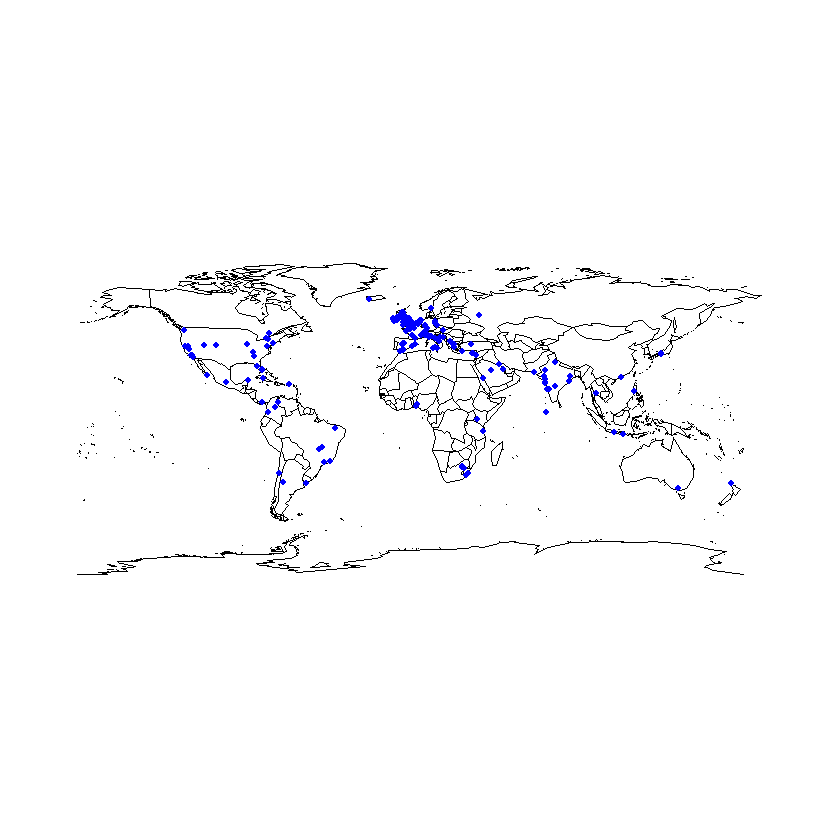

In [54]:
# this will make a map of the world with country boundaries
maps::map("world", lwd = .25)

# plotting the latitudes and longitudes onto the world map
points(Tweets_to_BK$lng, Tweets_to_BK$lat, pch = 20, cex = 1,col="blue")

Tweets made to booking.com are distributed across the world, in particular in the American continents, Europe, and Asia

##### 3. Retweets to `@bookingcom`

**Note: All tweets made by booking.com have no locations. Hence we can't analyze this dataset for locations** 

##### 4. Tweets made using `#bookingcom` hashtag

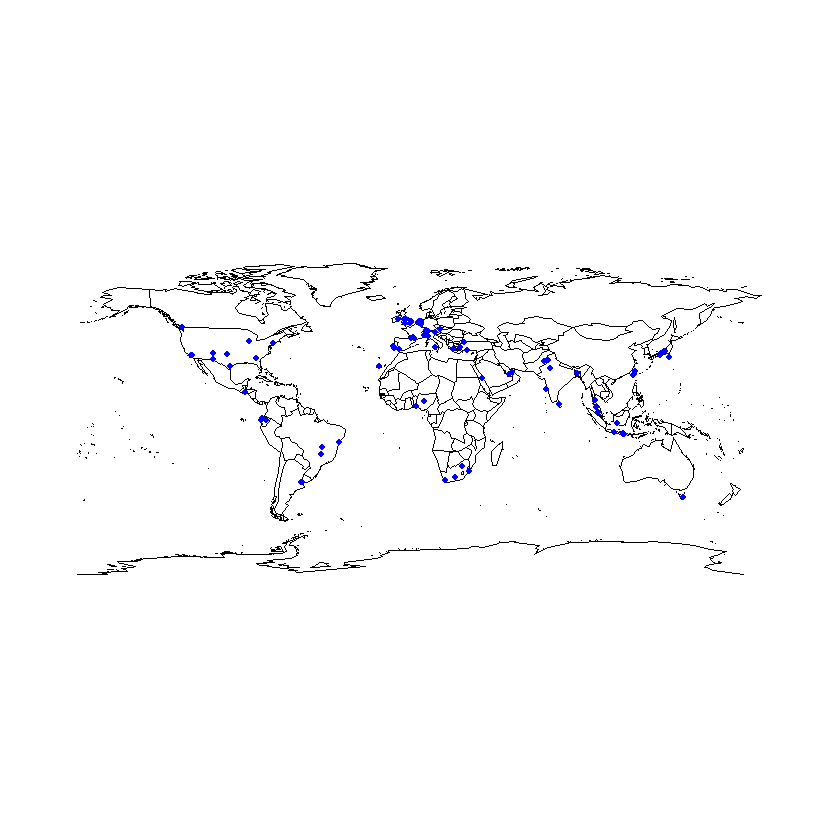

In [55]:
# this will make a map of the world with country boundaries
maps::map("world", lwd = .25)

# plotting the latitudes and longitudes onto the world map
points(hash_full$lng, hash_full$lat, pch = 20, cex = 1,col="blue")

Tweets made to booking.com are distributed across the world, in particular in the American continents, Europe, and Asia

##### 5. Tweets liked by `@bookingcom`

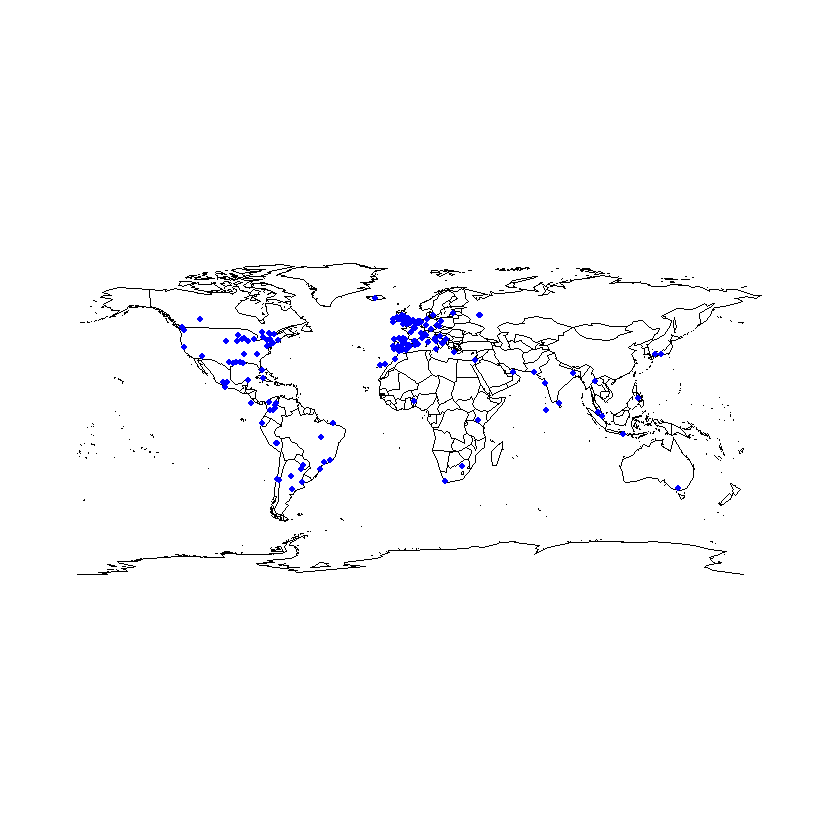

In [56]:
# this will make a map of the world with country boundaries
maps::map("world", lwd = .25)
# plotting the latitudes and longitudes onto the world map
points(booking_likes$lng, booking_likes$lat, pch = 20, cex = 1,col="blue")

Tweets liked by booking.com are from tweets originating mainly from the European countries, indicating that there are lots of happy travellers in Europe using booking.com's services. Europe seems to be an important zone for business!

##### 6. Followers of `@bookingcom`

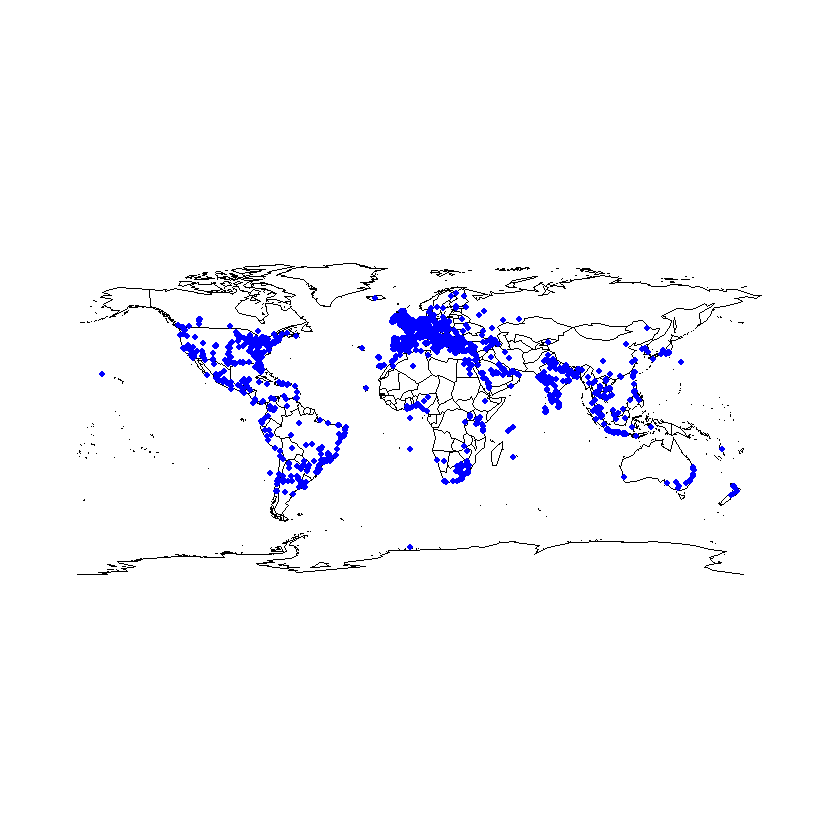

In [57]:
# this will make a map of the world with country boundaries
maps::map("world", lwd = .25)

# plotting the latitudes and longitudes onto the world map
points(followers_info$lng, followers_info$lat, pch = 20, cex = 1,col="blue")

@Bookingcom Twitter followers are densely clustered in the European, American and Asian Regions. They're also sparsely resident in some west, south and east African countries such as Nigeria, Ghana, South Africa e.t.c. A significant subset of their following are based in the Austrailian Regions as well. Overall, they can be said to be present in majority of the world's leading markets. 

##### 7. Tweets of Subscribers associated with `@bookingcom` lists

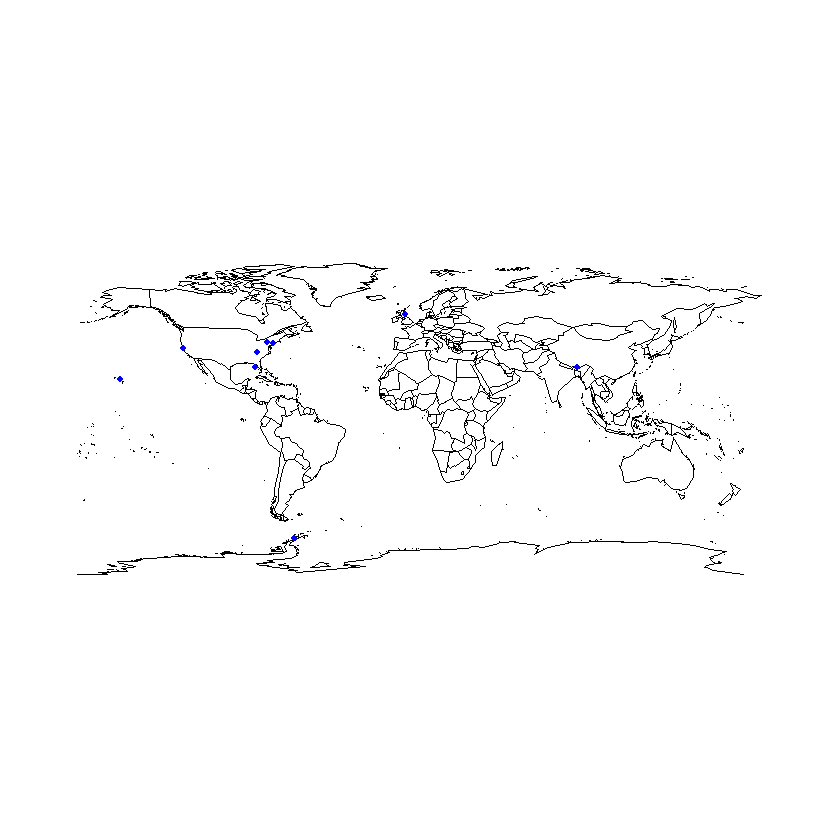

In [58]:
# this will make a map of the world with country boundaries
maps::map("world", lwd = .25)

# plotting the latitudes and longitudes onto the world map
points(final_lists_sub_tweets$lng, final_lists_sub_tweets$lat, pch = 20, cex = 1,col="blue")

the amount of data is not sufficient for analysis

##### 8. Tweets made with `booking.com` as keyword

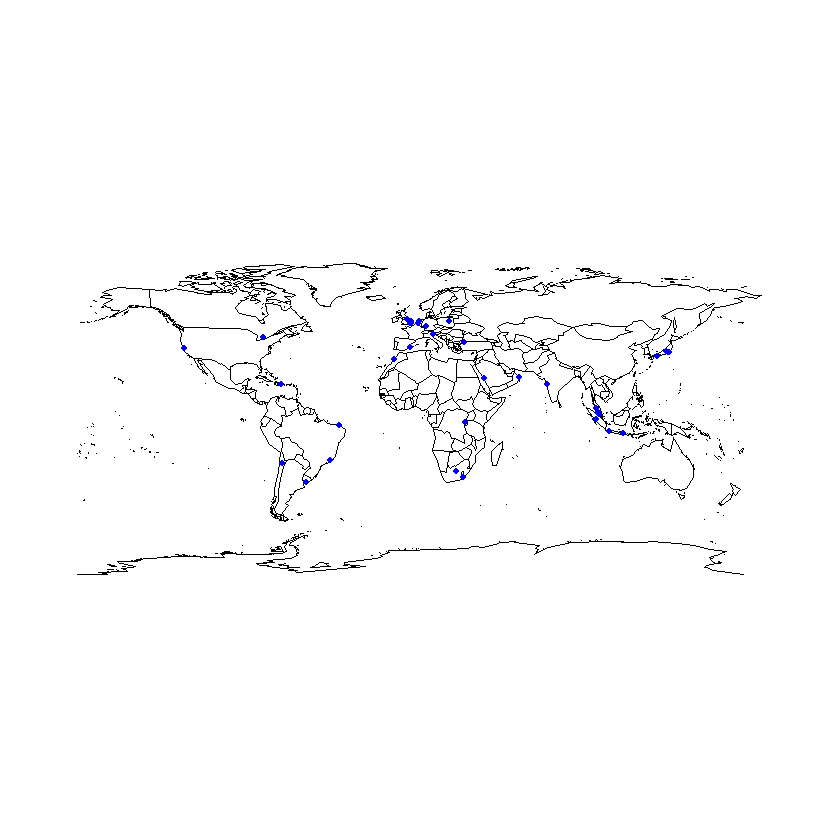

In [59]:
# this will make a map of the world with country boundaries
maps::map("world", lwd = .25)

# plotting the latitudes and longitudes onto the world map
points(bkgtweets$lng, bkgtweets$lat, pch = 20, cex = 1,col="blue")

Tweets made using the `booking.com` keyword is spread across the world, again mainly focussing on Europe!

## 2-B Top User Locations of the Tweets

##### 1. Tweets made by `@bookingcom`

**Note: All tweets made by booking.com have no locations. Hence we can't analyze this dataset for locations** 

##### 2. Tweets made to `@bookingcom`

In [60]:
# cleaning up the locations and mapping them to country using the countrycode package
library("countrycode")
to_BK_location <- Tweets_to_BK %>%
            mutate(location2 = gsub(x = location, pattern = "[^\x01-\x7F]", replacement = "")) %>%
            mutate(location2 = countryname(Tweets_to_BK$location, destination = "cldr.short.en", warn = FALSE)) %>%
            filter(!is.na(location2)) 

In [61]:
# Counting the top countries
to_BK_country <- to_BK_location %>%
            count(location2) %>%
            mutate(location2 = fct_reorder(location2, n)) %>%
            top_n(10)

Selecting by n


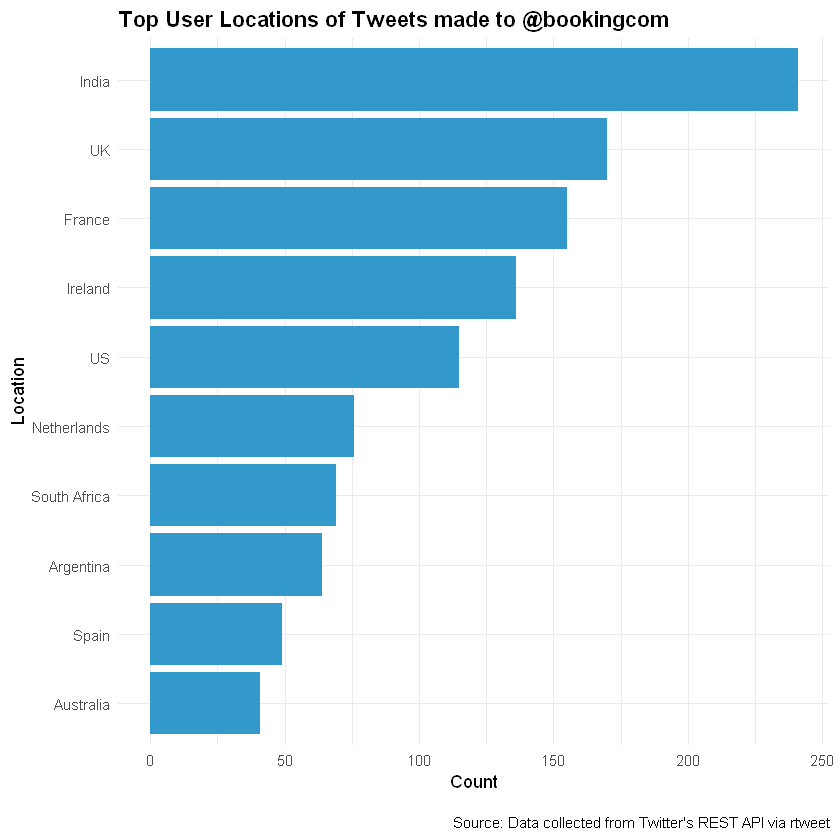

In [62]:
# Plotting the to booking.com tweet countries
ggplot(to_BK_country, aes(x = location2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col(fill="#3399CC") +
coord_flip() +
labs(x = "Location",
    y = "Count",
    title = "Top User Locations of Tweets made to @bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 3. Retweets to `@bookingcom`

**Note: All tweets made by booking.com have no locations. Hence we can't analyze this dataset for locations** 

##### 4. Tweets made using `#bookingcom` hashtag

In [63]:
# cleaning up the locations and mapping them to country using the countrycode package
library("countrycode")
hash_location <- hash_full %>%
            mutate(location2 = gsub(x = location, pattern = "[^\x01-\x7F]", replacement = "")) %>%
            mutate(location2 = countryname(hash_full$location, destination = "cldr.short.en", warn = FALSE)) %>%
            filter(!is.na(location2))     

In [64]:
# Counting the top countries
hash_country <- hash_location %>%
            count(location2) %>%
            mutate(location2 = fct_reorder(location2, n)) %>%
            top_n(10)

Selecting by n


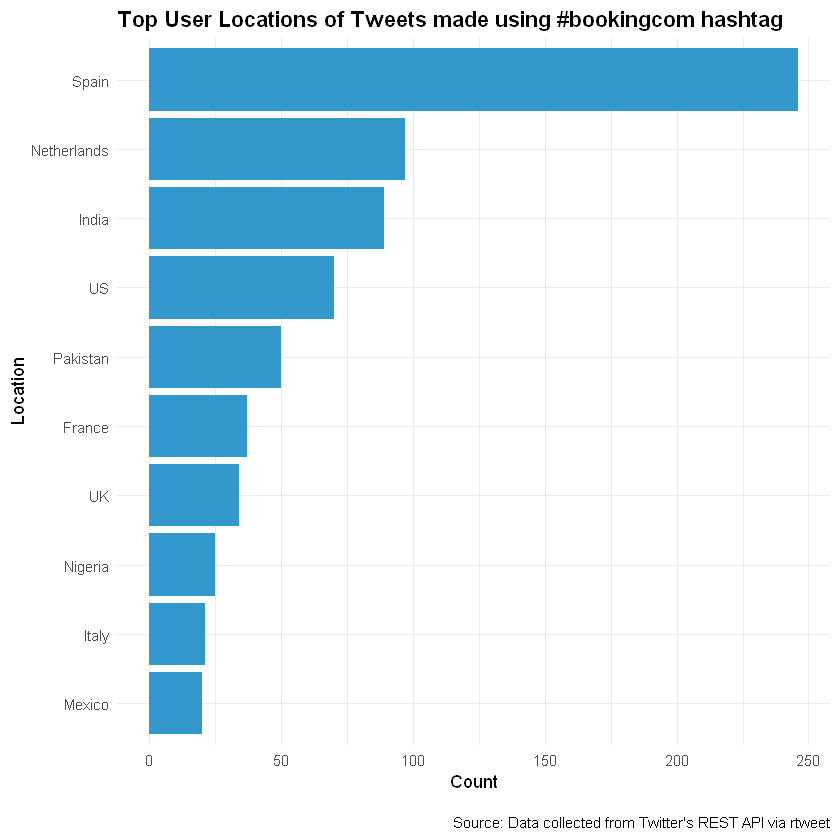

In [65]:
# Plotting the hashtag tweet countries
ggplot(hash_country, aes(x = location2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col(fill="#3399CC") +
coord_flip() +
labs(x = "Location",
    y = "Count",
    title = "Top User Locations of Tweets made using #bookingcom hashtag",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 5. Tweets liked by `@bookingcom`

In [66]:
# cleaning up the locations and mapping them to country using the countrycode package
likes_location <- booking_likes %>%
            mutate(location2 = gsub(x = location, pattern = "[^\x01-\x7F]", replacement = "")) %>%
            mutate(location2 = countryname(booking_likes$location, destination = "cldr.short.en", warn = FALSE)) %>%
            filter(!is.na(location2))    

In [67]:
# Counting the top countries
likes_country <- likes_location %>%
            count(location2) %>%
            mutate(location2 = fct_reorder(location2, n)) %>%
            top_n(10)

Selecting by n


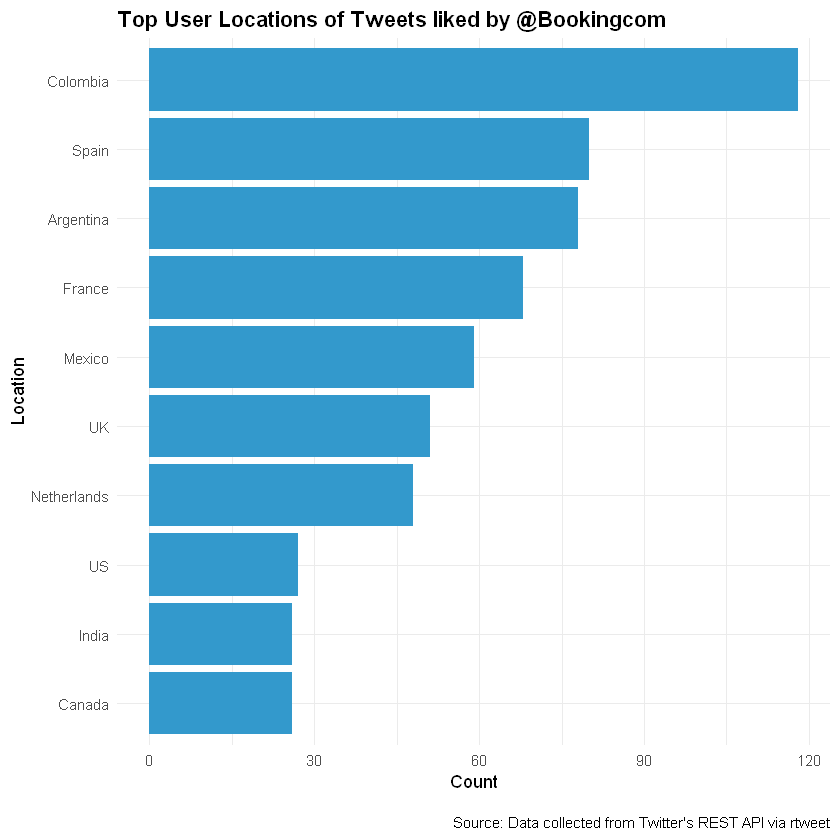

In [68]:
# Plotting the hashtag tweet countries
ggplot(likes_country, aes(x = location2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col(fill="#3399CC") +
coord_flip() +
labs(x = "Location",
    y = "Count",
    title = "Top User Locations of Tweets liked by @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 6. Followers of `@bookingcom`

In [69]:
# cleaning up the locations and mapping them to country using the countrycode package
followers_location <- followers_info %>%
            mutate(location2 = gsub(x = location, pattern = "[^\x01-\x7F]", replacement = "")) %>%
            mutate(location2 = countryname(followers_info$location, destination = "cldr.short.en", warn = FALSE)) %>%
            filter(!is.na(location2)) 

In [70]:
# Counting the top countries
followers_country <- followers_location %>%
            count(location2) %>%
            mutate(location2 = fct_reorder(location2, n)) %>%
            top_n(10)

Selecting by n


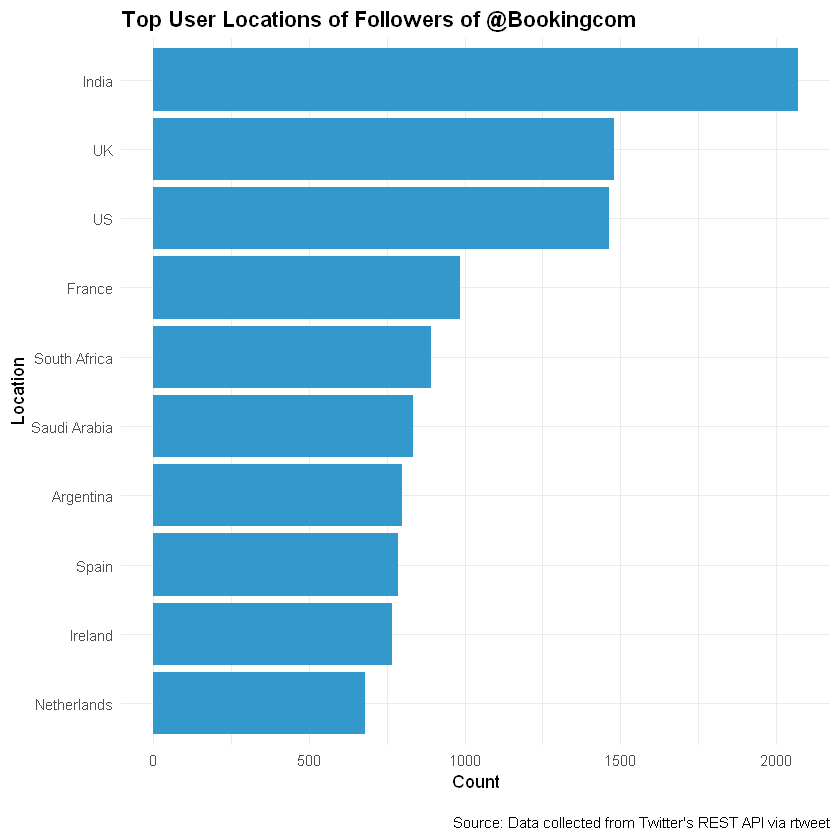

In [71]:
# Plotting the hashtag tweet countries
ggplot(followers_country, aes(x = location2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col(fill="#3399CC") +
coord_flip() +
labs(x = "Location",
    y = "Count",
    title = "Top User Locations of Followers of @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 7. Tweets of Subscribers associated with `@bookingcom` lists

In [72]:
# cleaning up the locations and mapping them to country using the countrycode package
lsts_comn_sub_lct <- final_lists_sub_tweets %>%
            mutate(location2 = gsub(x = location, pattern = "[^\x01-\x7F]", replacement = "")) %>%
            mutate(location2 = countryname(final_lists_sub_tweets$location, destination = "cldr.short.en", warn = FALSE)) %>%
            filter(!is.na(location2)) 

In [73]:
# Counting the top countries
lsts_comn_sub_ctry <- lsts_comn_sub_lct %>%
            count(location2) %>%
            mutate(location2 = fct_reorder(location2, n)) %>%
            top_n(10)

Selecting by n


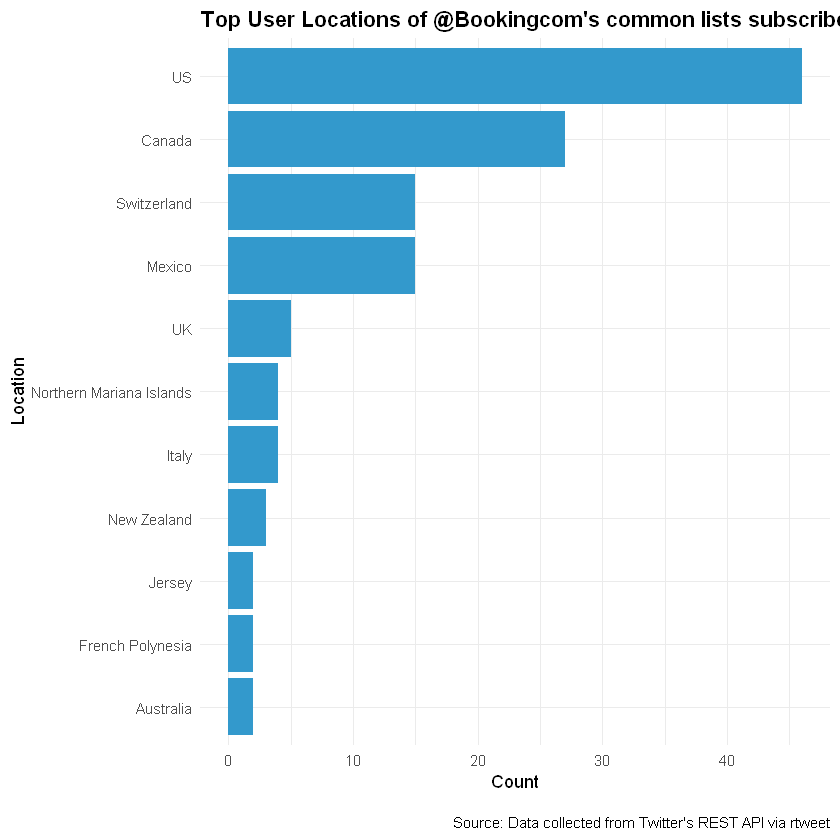

In [74]:
# Plotting the hashtag tweet countries
ggplot(lsts_comn_sub_ctry, aes(x = location2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col(fill="#3399CC") +
coord_flip() +
labs(x = "Location",
    y = "Count",
    title = "Top User Locations of @Bookingcom's common lists subscribers",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 8. Tweets made with `booking.com` as keyword

In [75]:
# cleaning up the locations and mapping them to country using the countrycode package
bkgtweets_location <- bkgtweets %>%
            mutate(location2 = gsub(x = location, pattern = "[^\x01-\x7F]", replacement = "")) %>%
            mutate(location2 = countryname(bkgtweets$location, destination = "cldr.short.en", warn = FALSE)) %>%
            filter(!is.na(location2))    

In [76]:
# Counting the top countries
bkgtweets_country <- bkgtweets_location %>%
            count(location2) %>%
            mutate(location2 = fct_reorder(location2, n)) %>%
            top_n(10)

Selecting by n


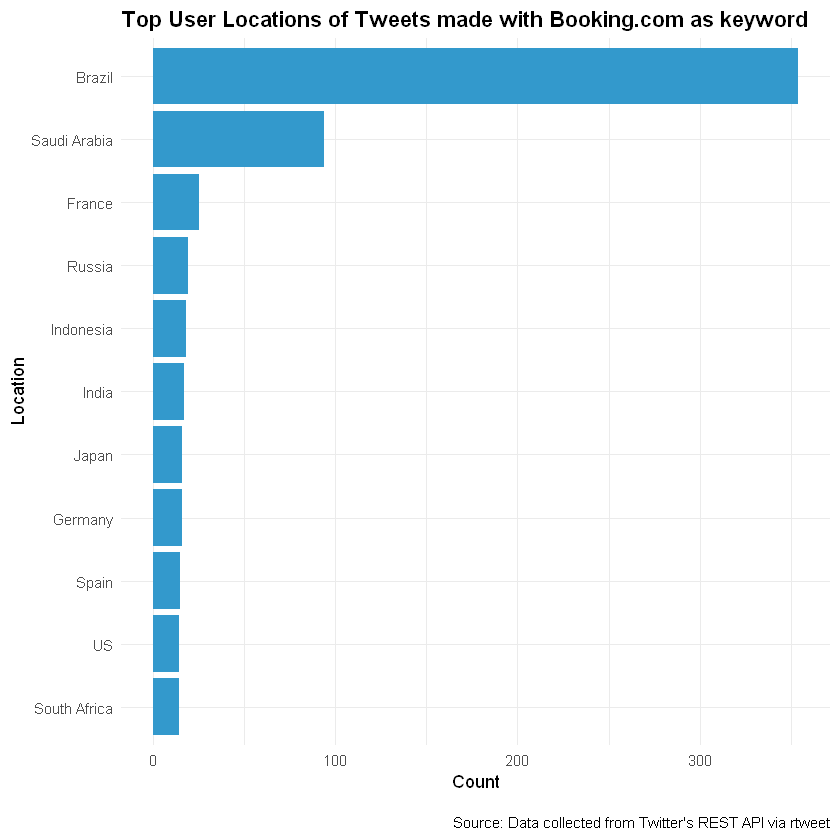

In [77]:
# Plotting the hashtag tweet countries
ggplot(bkgtweets_country, aes(x = location2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col(fill="#3399CC") +
coord_flip() +
labs(x = "Location",
    y = "Count",
    title = "Top User Locations of Tweets made with Booking.com as keyword",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

# Part 3: Analyzing the Frequency of Tweets

##### 1. Tweets made by `@bookingcom`

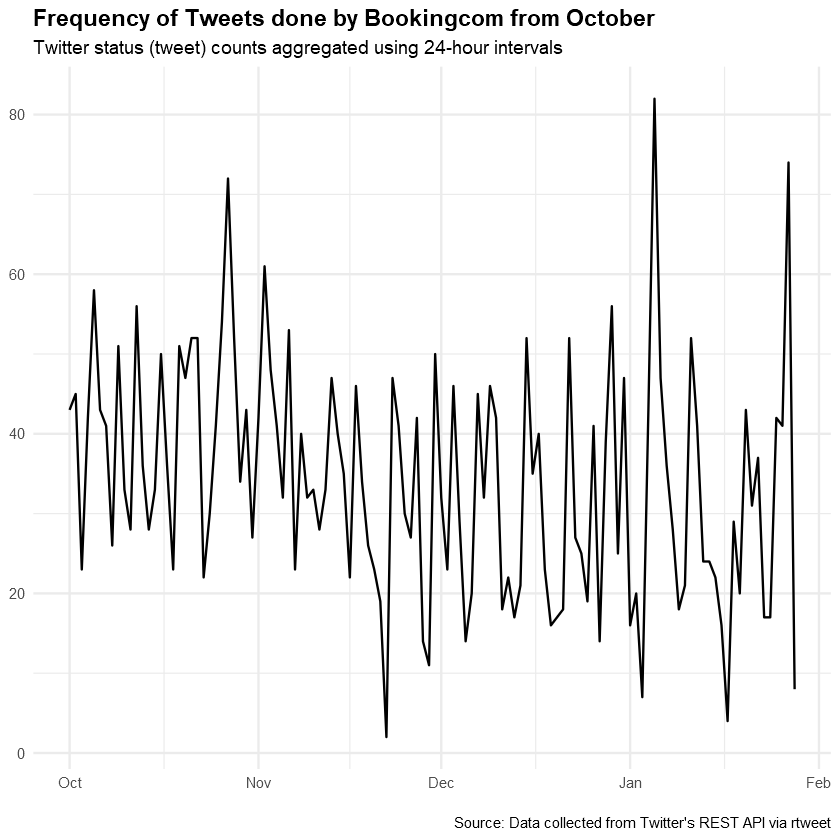

In [104]:
Tweets_by_BK %>%
  ts_plot("24 hours") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of Tweets done by Bookingcom from October",
    subtitle = "Twitter status (tweet) counts aggregated using 24-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

Over a 5-month period (Oct 2020 - Feb 2021), an average of 50 tweets / 24hours were made by @bookingcom

##### 2. Tweets made to `@bookingcom`

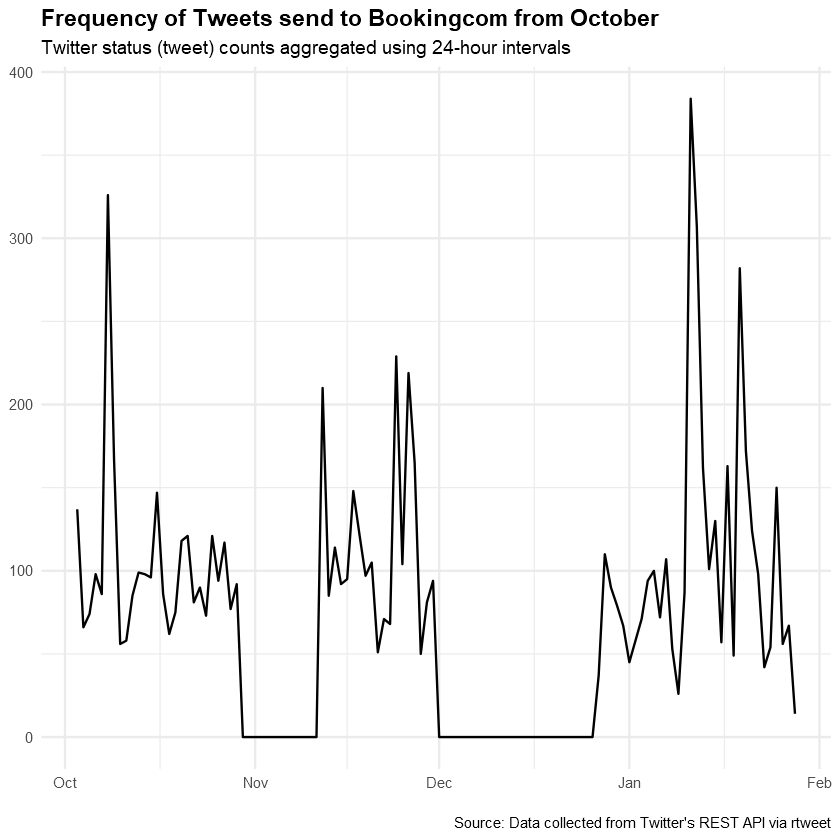

In [105]:
Tweets_to_BK %>%
  ts_plot("24 hours") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of Tweets send to Bookingcom from October",
    subtitle = "Twitter status (tweet) counts aggregated using 24-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

Over the same period (Oct 2020 - Feb 2021), an average of 100 tweets / 24 hours were made to @bookingcom account by different twitter users

##### 3. Retweets to `@bookingcom`

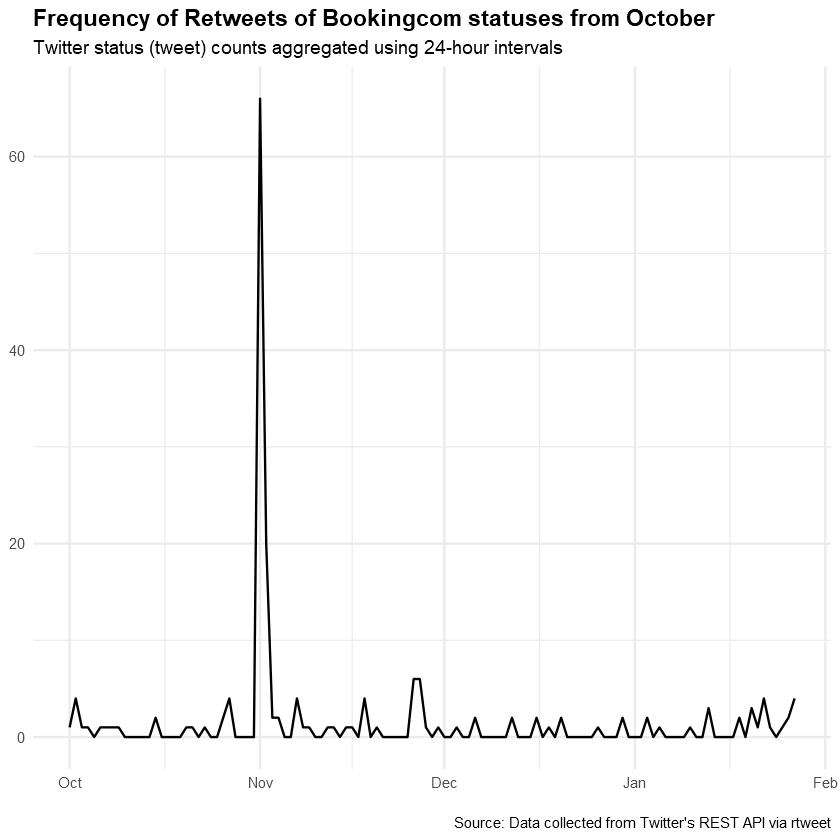

In [106]:
Retweets_to_BK %>%
  ts_plot("24 hours") +
  ggplot2::theme_minimal() +
  ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
  ggplot2::labs(
    x = NULL, y = NULL,
    title = "Frequency of Retweets of Bookingcom statuses from October",
    subtitle = "Twitter status (tweet) counts aggregated using 24-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

retweets to @Bookingcom's tweets were barely made during this time except for a spike of up to 60 retweets in the first week of November 2020

##### 4. Tweets made using `#bookingcom` hashtag

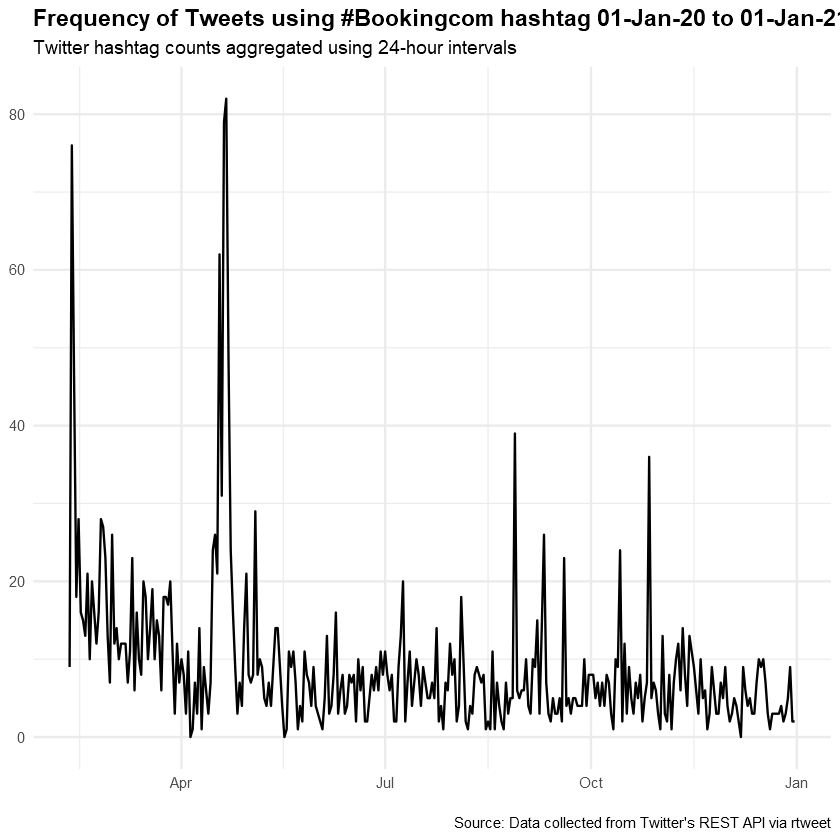

In [107]:
hash_full %>%
  ts_plot("24 hours") +
  theme_minimal() +
  theme(plot.title = ggplot2::element_text(face = "bold")) +
  labs(
    x = NULL, y = NULL,
    title = "Frequency of Tweets using #Bookingcom hashtag 01-Jan-20 to 01-Jan-21",
    subtitle = "Twitter hashtag counts aggregated using 24-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

#Bookingcom hashtag maintained an average usage of about 10 instances / 24 hours from Feb 2020 to Jan 2021

##### 5. Tweets liked by `@bookingcom`

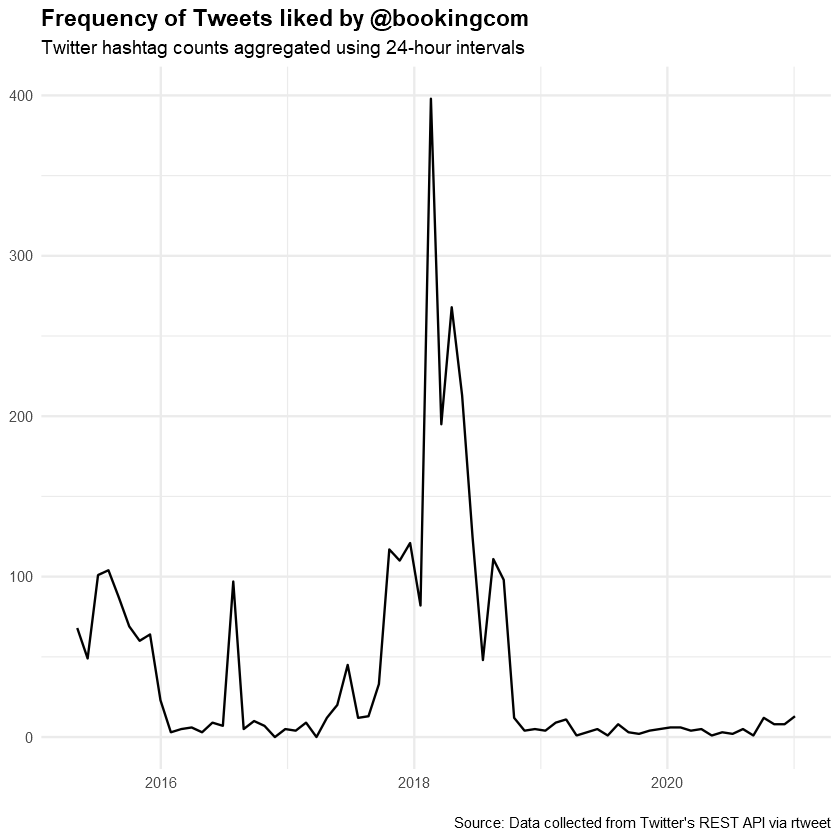

In [108]:
booking_likes %>%
  ts_plot("1 month") +
  theme_minimal() +
  theme(plot.title = ggplot2::element_text(face = "bold")) +
  labs(
    x = NULL, y = NULL,
    title = "Frequency of Tweets liked by @bookingcom",
    subtitle = "Twitter hashtag counts aggregated using 24-hour intervals",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet"
  )

##### 6. Tweets from `booking.com`'s followers

**Not Applicable: Can't plot the tweets for `@bookingcom` `Followers`. Dataset captures only timeline's most recent tweets**

##### 7. Tweets from `booking.com`'s Lists Common Subscribers

**Not Applicable: Can't plot the tweets for `@bookingcom`s ` Lists Common Subscribers`. Dataset captures only timeline's most recent tweets**

##### 8. Tweets made with `booking.com` as keyword

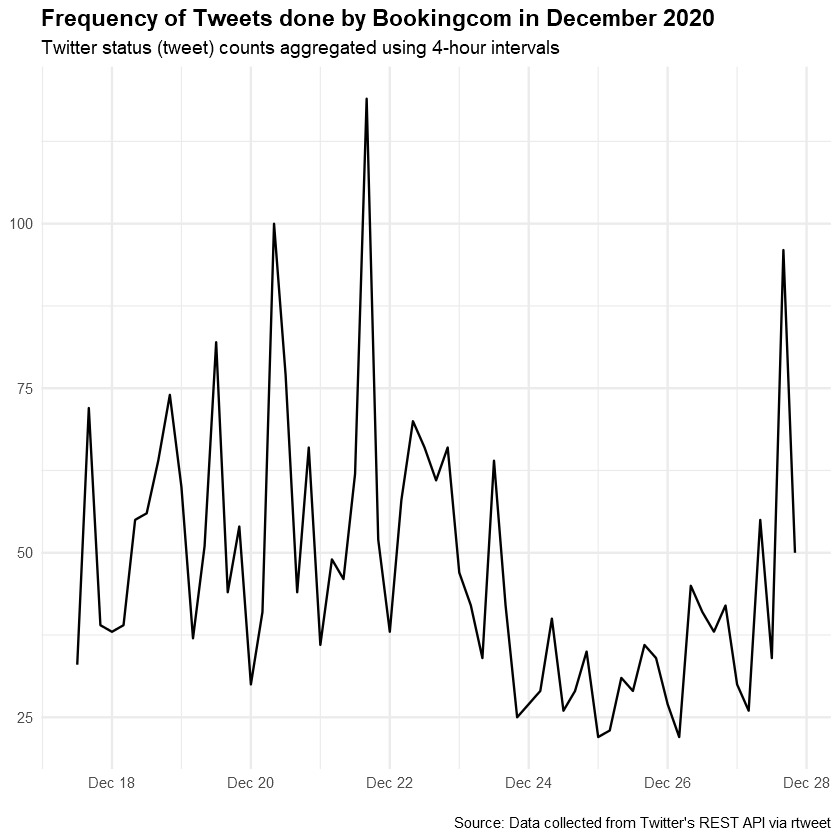

In [109]:
bkgtweets %>%
ts_plot("4 hours") +
ggplot2::theme_minimal() +
ggplot2::theme(plot.title = ggplot2::element_text(face = "bold")) +
ggplot2::labs(
x = NULL, y = NULL,
title = "Frequency of Tweets done by Bookingcom in December 2020",
subtitle = "Twitter status (tweet) counts aggregated using 4-hour intervals",
caption = "\nSource: Data collected from Twitter's REST API via rtweet"
)

# Part 4: Analyzing the Top Sources of Tweets

##### 1. Tweets made by `@bookingcom`

In [110]:
Tweets_by_BK_source <- Tweets_by_BK %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



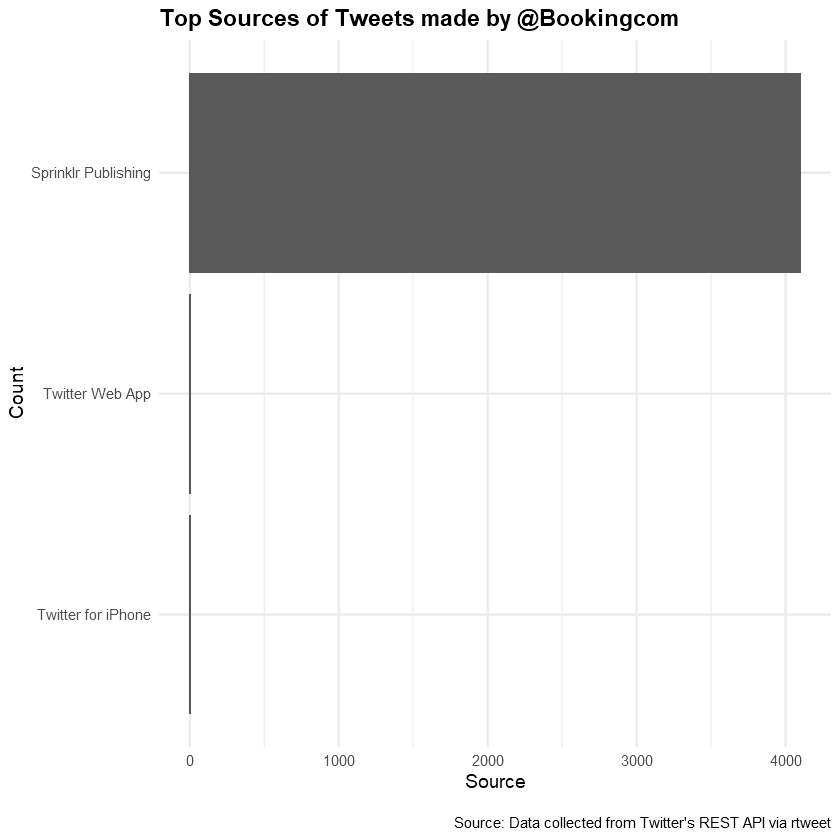

In [111]:
# Plotting the hashtag tweet sources
ggplot(Tweets_by_BK_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources of Tweets made by @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

@bookingcom uses the SaaS publishing platform (Sprinklr) to send out twwets on its tweeter community

##### 2. Tweets made to `@bookingcom`

In [112]:
Tweets_to_BK_source <- Tweets_to_BK %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



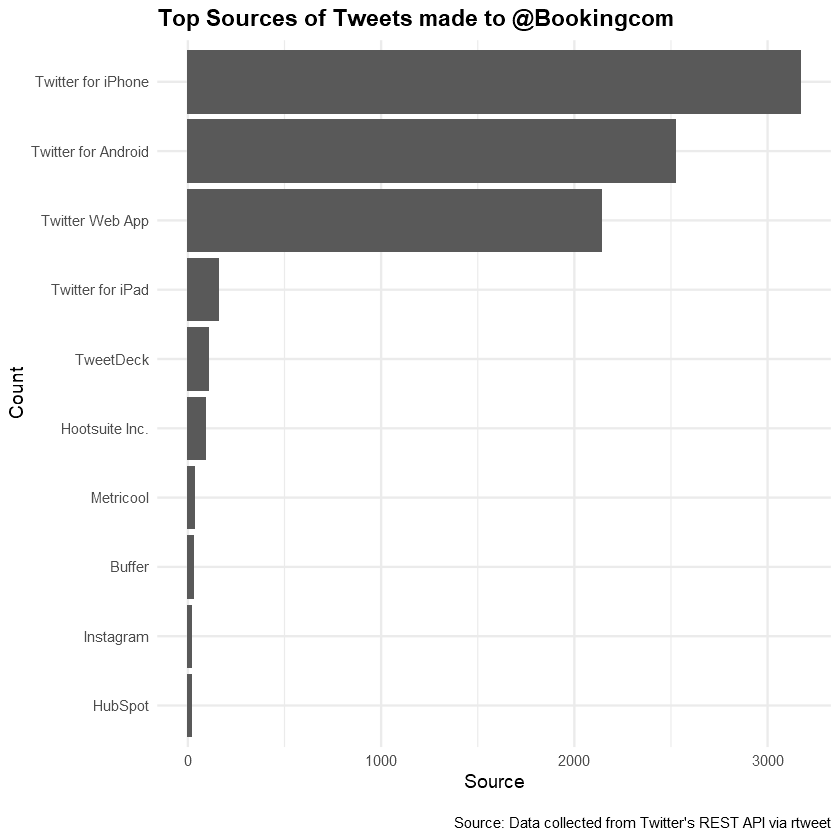

In [113]:
# Plotting the hashtag tweet sources
ggplot(Tweets_to_BK_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources of Tweets made to @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 3. Retweets to `@bookingcom`

In [114]:
Retweets_to_BK_source <- Retweets_to_BK %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



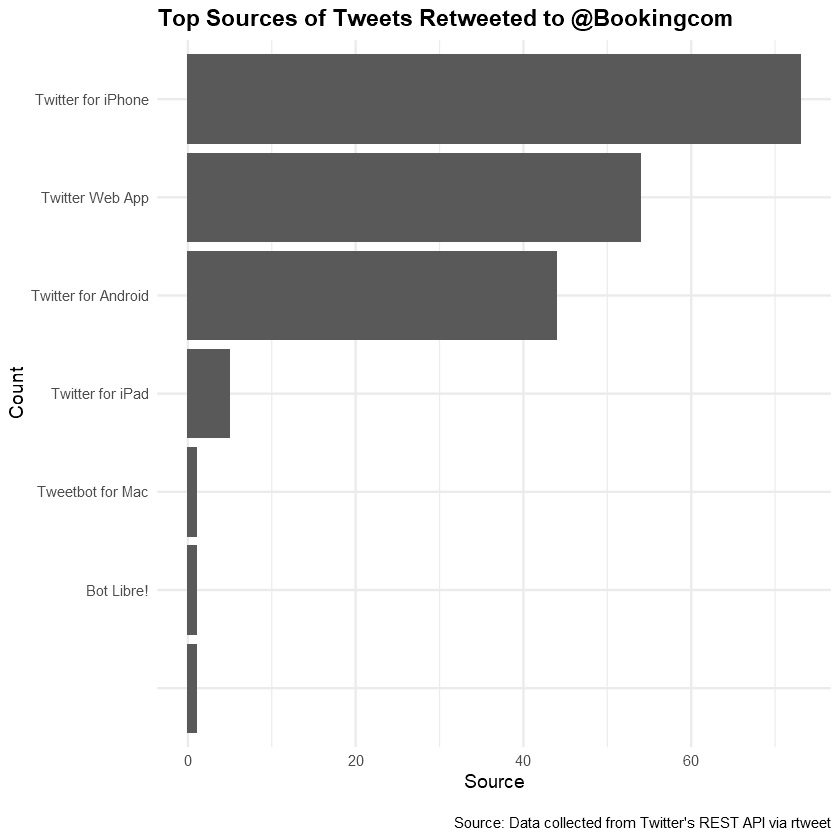

In [115]:
# Plotting the hashtag tweet sources
ggplot(Retweets_to_BK_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources of Tweets Retweeted to @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 4. Tweets made using `#bookingcom` hashtag

In [116]:
hash_source <- hash_full %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



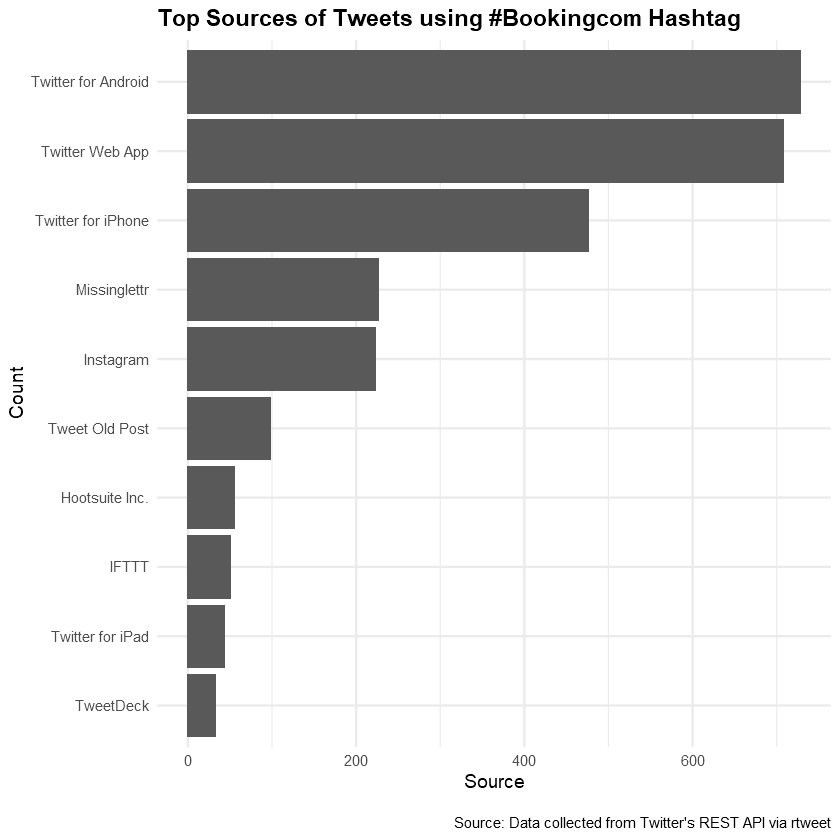

In [117]:
# Plotting the hashtag tweet sources
ggplot(hash_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources of Tweets using #Bookingcom Hashtag",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 5. Tweets liked by `@bookingcom`

In [118]:
likes_source <- booking_likes %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



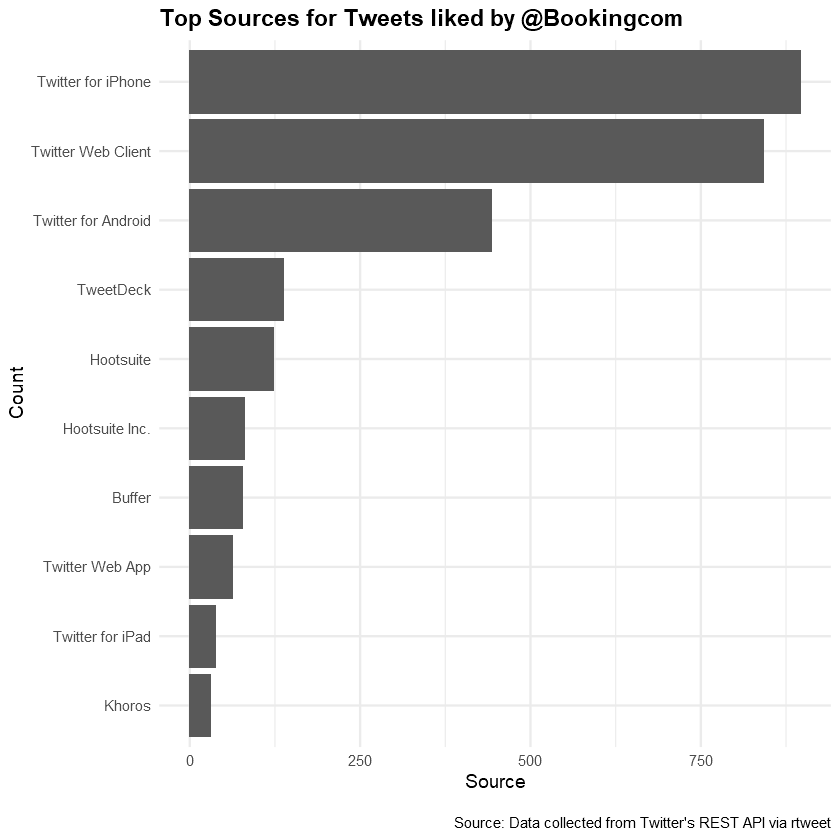

In [119]:
# Plotting the hashtag tweet sources
ggplot(likes_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources for Tweets liked by @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 6. Followers of `@bookingcom`

In [120]:
followers_source <- followers_info %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



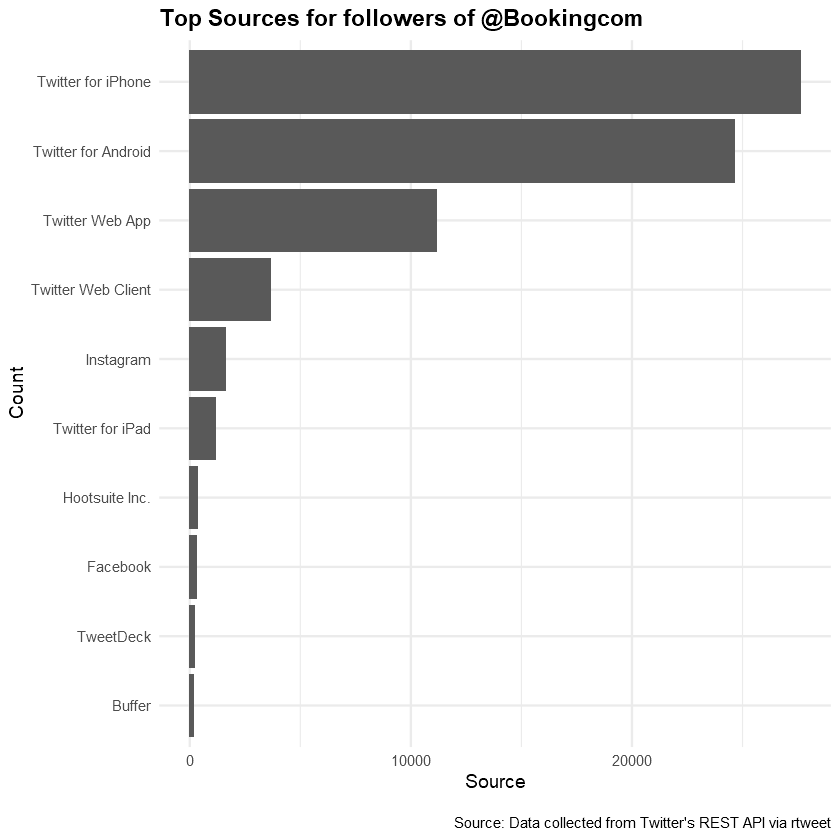

In [121]:
# Plotting the hashtag tweet sources
ggplot(followers_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources for followers of @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 7. Tweets of Subscribers associated with `@bookingcom` lists

In [122]:
lists_source <- final_lists_sub_tweets %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



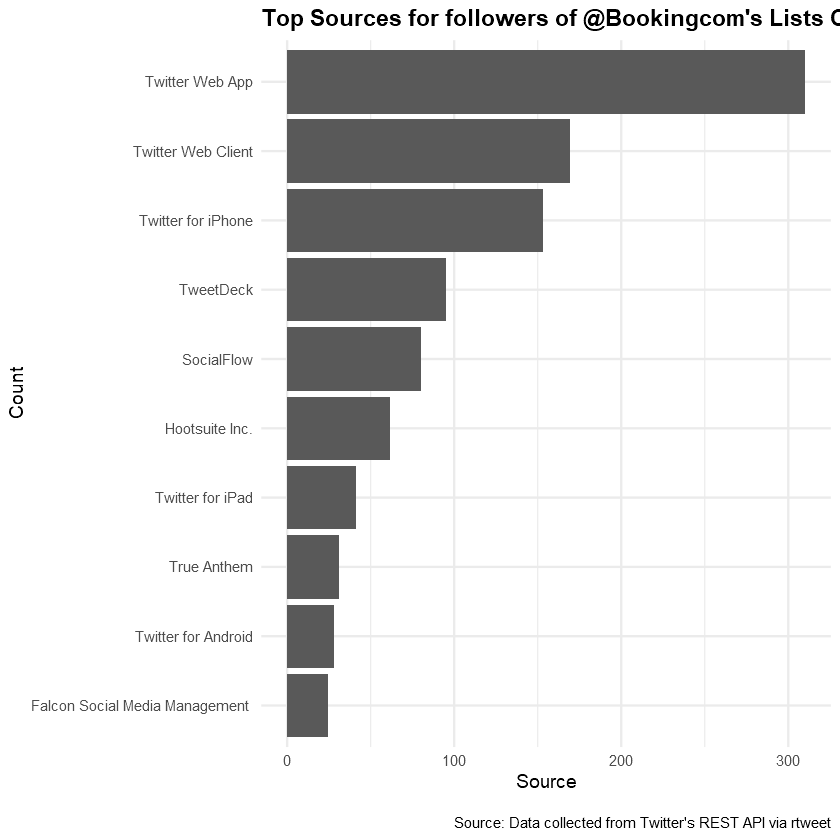

In [123]:
# Plotting the hashtag tweet sources
ggplot(lists_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources for followers of @Bookingcom's Lists Common Subscribers",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 8. Tweets made with `booking.com` as keyword

In [124]:
bkgtweets_source <- bkgtweets %>%
            count(source) %>%
            mutate(source2 = fct_reorder(source, n)) %>%
            top_n(10)

Selecting by source2



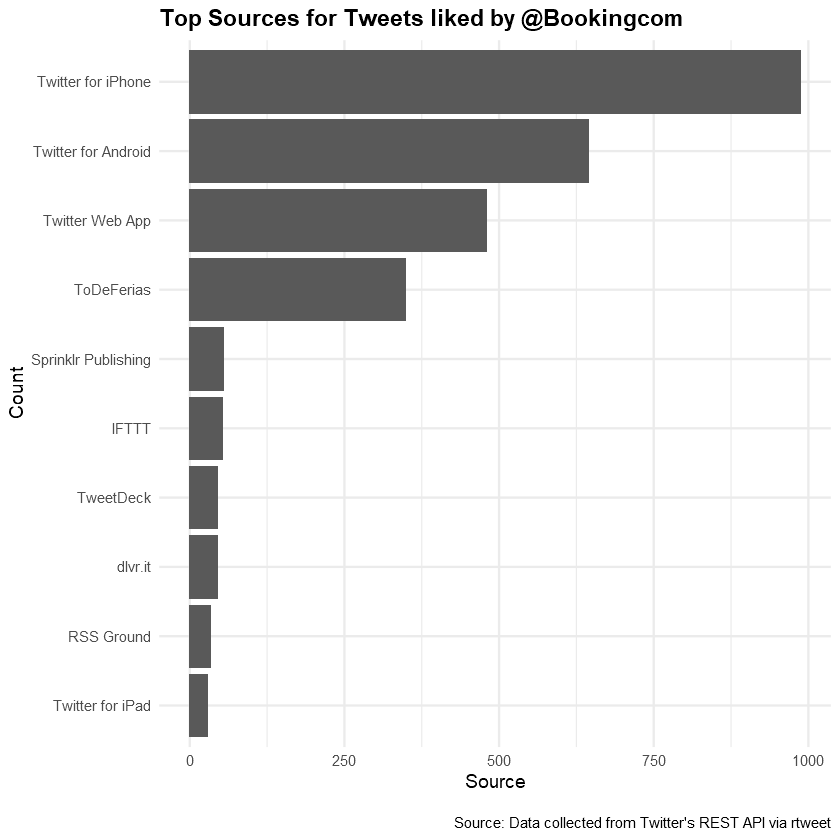

In [125]:
# Plotting the hashtag tweet sources
ggplot(bkgtweets_source, aes(x = source2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Sources for Tweets liked by @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

Overall Summary: Twitter for Iphone is the most widely used tweeting channel within the Bookingcom twitter environment

# Part 5: Top Tweeters (Screen Names)

##### 1. Tweets made by `@bookingcom`

As tweets were made by booking.com itself, pointless to analyze this dataset

##### 2. Tweets made to `@bookingcom`

In [126]:
Tweets_to_BK_screen_name <- Tweets_to_BK %>%
            count(screen_name) %>%
            mutate(screen_name2 = fct_reorder(screen_name, n)) %>%
            top_n(10)

Selecting by screen_name2



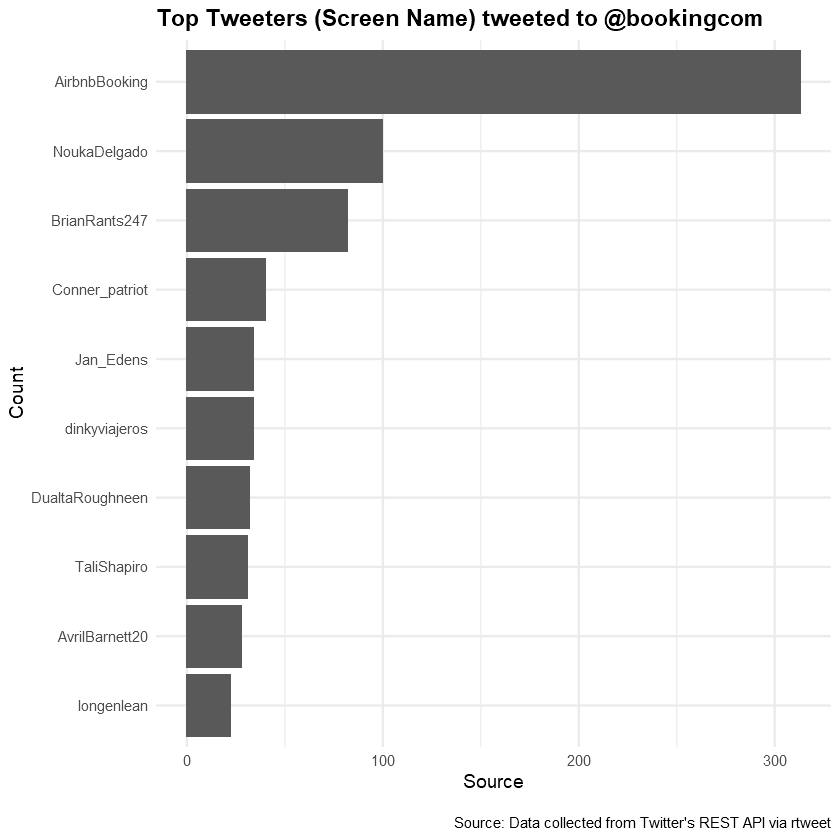

In [127]:
# Plotting the hashtag tweet screen names
ggplot(Tweets_to_BK_screen_name, aes(x = screen_name2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Tweeters (Screen Name) tweeted to @bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 3. Retweets to `@bookingcom`

As tweets were made by booking.com itself, pointless to analyze this dataset

##### 4. Tweets made using `#bookingcom` hashtag

In [128]:
hash_screen_name <- hash_full %>%
            count(screen_name) %>%
            mutate(screen_name2 = fct_reorder(screen_name, n)) %>%
            top_n(10)

Selecting by screen_name2



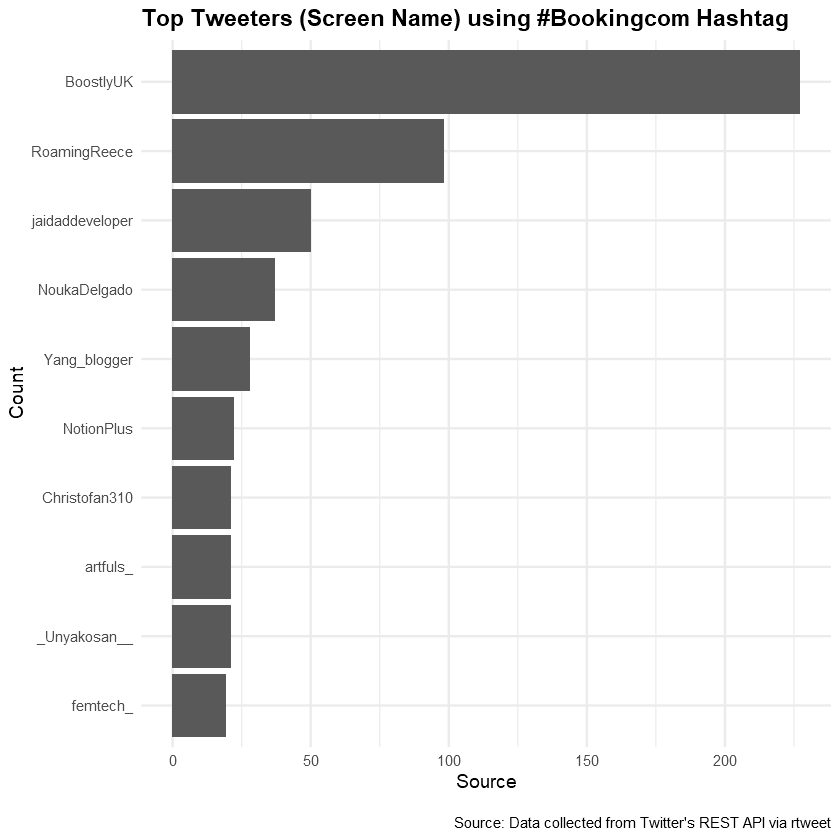

In [129]:
# Plotting the hashtag tweet screen names
ggplot(hash_screen_name, aes(x = screen_name2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Tweeters (Screen Name) using #Bookingcom Hashtag",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 5. Tweets liked by `@bookingcom`

In [130]:
likes_screen_name <- booking_likes %>%
            count(screen_name) %>%
            mutate(screen_name2 = fct_reorder(screen_name, n)) %>%
            top_n(10)

Selecting by screen_name2



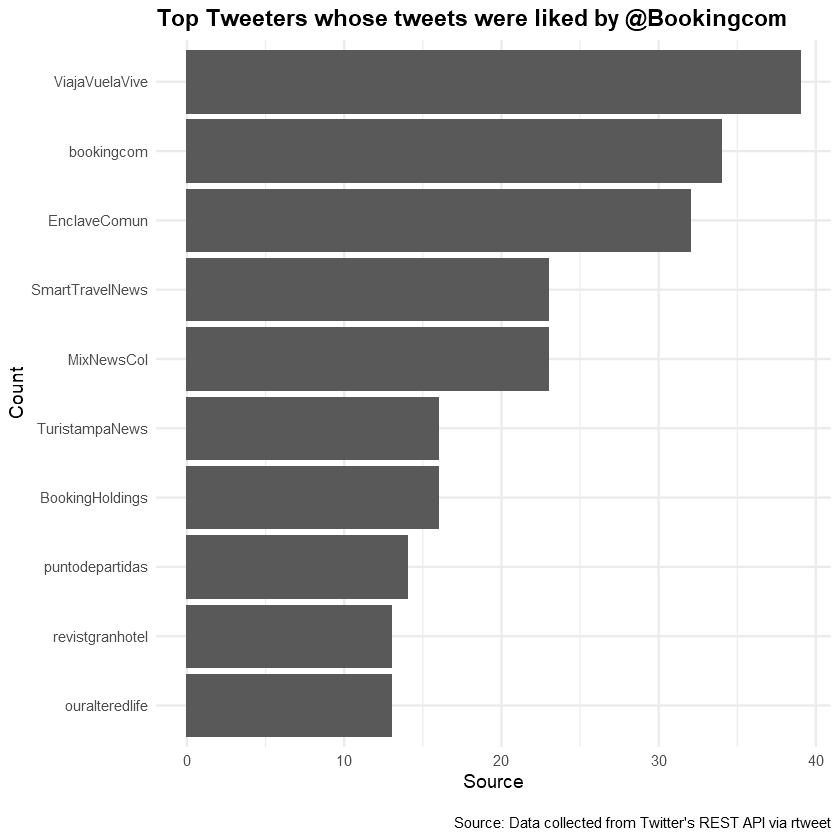

In [131]:
# Plotting the hashtag tweet screen names
ggplot(likes_screen_name, aes(x = screen_name2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Tweeters whose tweets were liked by @Bookingcom",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 6. Followers of `@bookingcom`

**Not Applicable: Dataset captures only 1 tweet for each distinct follower**

followers_info$user_id
<fct>
3090442818
1347766588951285762
433797298
1327088203799482369
1354937348539248651
2854962997
3003054579
4870053839
798654361


In [144]:
Followers_screen_name<- new_followers_info %>%
            count(screen_name) %>%
            mutate(screen_name2 = fct_reorder(screen_name, n)) %>%
            top_n(10)


Selecting by screen_name2



In [145]:
head(Followers_screen_name)

,screen_name,n,screen_name2
,<chr>,<int>,<fct>
1,zyramomey95,1,zyramomey95
2,zzaaaackk,1,zzaaaackk
3,ZzBb14233610,1,ZzBb14233610
4,Zzelenoviiux,1,Zzelenoviiux
5,ZZemel,1,ZZemel
6,ZzKB84,1,ZzKB84


##### 7. Tweets of Subscribers associated with `@bookingcom` lists

In [146]:
lists_screen_name <- final_lists_sub_tweets %>%
            count(screen_name) %>%
            mutate(screen_name2 = fct_reorder(screen_name, n)) %>%
            top_n(10)


Selecting by screen_name2



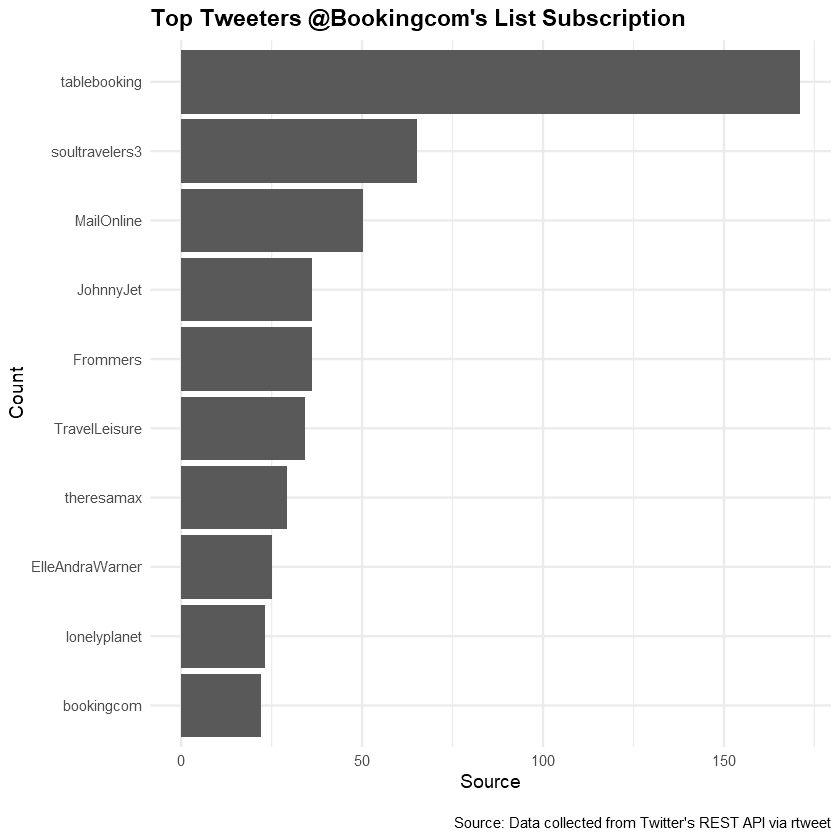

In [147]:
# Plotting the hashtag tweet screen names
ggplot(lists_screen_name, aes(x = screen_name2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Tweeters @Bookingcom's List Subscription",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

##### 8. Tweets made with `booking.com` as keyword

In [148]:
bkgtweets_screen_name <- bkgtweets %>%
            count(screen_name) %>%
            mutate(screen_name2 = fct_reorder(screen_name, n)) %>%
            top_n(10)

Selecting by screen_name2



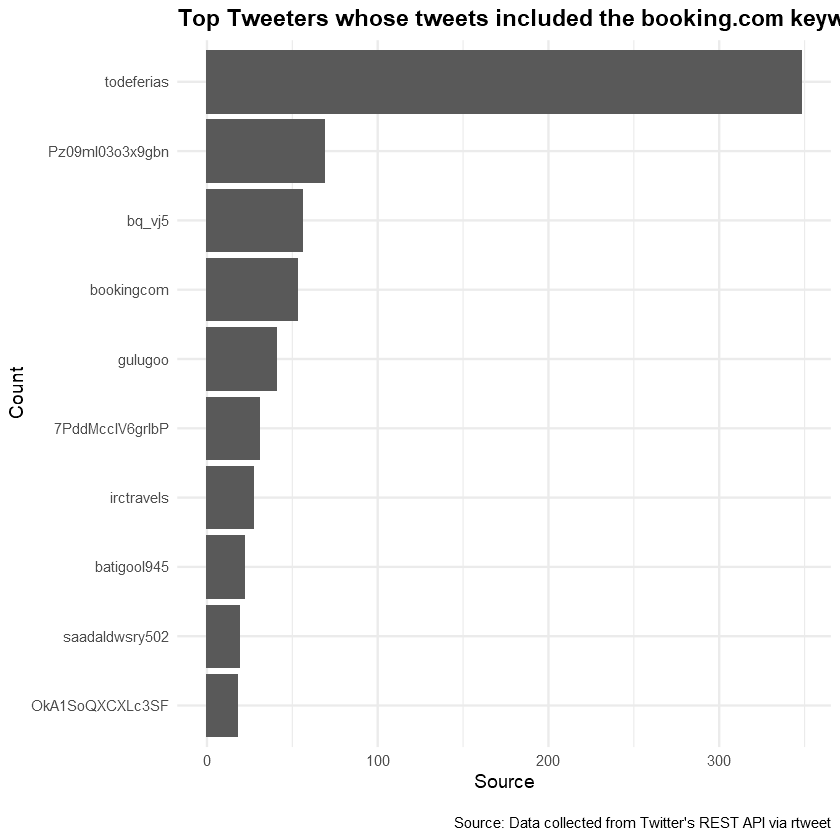

In [149]:
# Plotting the hashtag tweet screen names
ggplot(bkgtweets_screen_name, aes(x = screen_name2, y = n)) + 
theme_minimal() +
theme(plot.title = ggplot2::element_text(face = "bold")) +
geom_col() +
coord_flip() +
labs(x = "Count",
    y = "Source",
    title = "Top Tweeters whose tweets included the booking.com keyword",
    caption = "\nSource: Data collected from Twitter's REST API via rtweet")

# Part 6: Top Hashtags

##### 1. Tweets made by `@bookingcom`

In [150]:
Tweets_by_BK_hash_extracted <- str_extract_all(Tweets_by_BK$text, "#\\S+")
Tweets_by_BK_hash_extracted <- Tweets_by_BK_hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [158]:
Tweets_by_BK_hash_extracted

.
<int>


In [159]:
wordcloud <- wordcloud2(data = Tweets_by_BK_hash_extracted, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

ERROR: Error in `[.data.frame`(data, , 1:2): undefined columns selected


**Note: Only top 3 hashtags, hence can't make a word cloud**

##### 2. Tweets made to `@bookingcom`

In [160]:
Tweets_to_BK_hash_extracted <- str_extract_all(Tweets_to_BK$text, "#\\S+")
Tweets_to_BK_hash_extracted <- Tweets_to_BK_hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [161]:
# renaming the columns of the dataframe
colnames(Tweets_to_BK_hash_extracted) <- c("word", "freq")

# Subsetting the hash dataframe to the top 30 most frequent hashtags
Tweets_to_BK_hash_extracted <- Tweets_to_BK_hash_extracted[1:100,]

# Knowing that the search history is based on #bookingcom, we can remove it and see the rest of the hashtags
# Tweets_by_BK_hash_extracted <- Tweets_by_BK_hash_extracted[-1,]

ERROR: Error in names(x) <- value: 'names' attribute [2] must be the same length as the vector [1]


In [ ]:
wordcloud <- wordcloud2(data = Tweets_to_BK_hash_extracted, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(Tweets_to_BK_hash_extracted$word, Tweets_to_BK_hash_extracted$freq,
          max.words=50,
          scale=c(3,1),
          colors = "#F29545")

##### 3. Retweets to `@bookingcom`

In [ ]:
Retweets_to_BK_hash_extracted <- str_extract_all(Retweets_to_BK$text, "#\\S+")
Retweets_to_BK_hash_extracted <- Retweets_to_BK_hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [ ]:
# renaming the columns of the dataframe
colnames(Retweets_to_BK_hash_extracted) <- c("word", "freq")

# Subsetting the hash dataframe to the top 30 most frequent hashtags
Retweets_to_BK_hash_extracted <- Retweets_to_BK_hash_extracted[1:100,]

# Knowing that the search history is based on #bookingcom, we can remove it and see the rest of the hashtags
# Tweets_by_BK_hash_extracted <- Tweets_by_BK_hash_extracted[-1,]

In [ ]:
wordcloud <- wordcloud2(data = Retweets_to_BK_hash_extracted, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
head(Retweets_to_BK_hash_extracted)

**Very few words for plotting word cloud**

##### 4. Tweets made using `#bookingcom` hashtag

In [ ]:
hash_extracted <- str_extract_all(hash_full$text, "#\\S+")
hash_extracted <- hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [ ]:
# renaming the columns of the dataframe
colnames(hash_extracted) <- c("word", "freq")

# Subsetting the hash dataframe to the top 100 most frequent hashtags
top_hashtags <- hash_extracted[1:100,]

In [ ]:
# Knowing that the search history is based on #bookingcom, we can remove it and see the rest of the hashtags
top_hashtags <- top_hashtags[-1,]

In [ ]:
wordcloud <- wordcloud2(data = top_hashtags, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(top_hashtags$word,top_hashtags$freq,
          max.words=50,
          scale=c(3,1),
          colors = "#F29545")

##### 5. Tweets liked by `@bookingcom`

In [153]:
likes_hash_extracted <- str_extract_all(booking_likes$text, "#\\S+")
likes_hash_extracted <- likes_hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [154]:
# renaming the columns of the dataframe
colnames(likes_hash_extracted) <- c("word", "freq")

# Subsetting the hash dataframe to the top 30 most frequent hashtags
top_likes_hashtags <- likes_hash_extracted[1:100,]

ERROR: Error in names(x) <- value: 'names' attribute [2] must be the same length as the vector [1]


In [ ]:
wordcloud(top_likes_hashtags$word,top_likes_hashtags$freq,
          max.words=50,
          scale=c(3,1),
          colors = "#F29545")

##### 6. Followers of @bookingcom

**Note: Not possible to get the hashtags of followers**

##### 7. Tweets of Subscribers associated with `@bookingcom` lists

In [ ]:
final_lists_sub_tweets_hash_extracted <- str_extract_all(final_lists_sub_tweets$text, "#\\S+")
final_lists_sub_tweets_hash_extracted <- final_lists_sub_tweets_hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [ ]:
# renaming the columns of the dataframe
colnames(final_lists_sub_tweets_hash_extracted) <- c("word", "freq")

In [ ]:
# Subsetting the hash dataframe to the top 30 most frequent hashtags
final_lists_sub_tweets_hash_extracted <- final_lists_sub_tweets_hash_extracted[1:100,]

In [ ]:
wordcloud <- wordcloud2(data = final_lists_sub_tweets_hash_extracted, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:

wordcloud(final_lists_sub_tweets_hash_extracted$word, final_lists_sub_tweets_hash_extracted$freq,
          max.words=50,
          scale=c(3,1),
          colors = "#F29545")

##### 8. Tweets made with `booking.com` as keyword

In [ ]:
bkgtweets_hash_extracted <- str_extract_all(bkgtweets$text, "#\\S+")
bkgtweets_hash_extracted <- bkgtweets_hash_extracted %>%
                    unlist() %>% # unlisting all to bring all hasthags to a single list
                    tolower() %>% # bringing all hasthags to lowercase
                    table() %>% # converting to a frequency table
                    sort(decreasing = TRUE)  %>% # sorting from highest value to lowest value
                    as.data.frame() # converting table to dataframe

In [ ]:
# renaming the columns of the dataframe
colnames(bkgtweets_hash_extracted) <- c("word", "freq")

# Subsetting the hash dataframe to the top 30 most frequent hashtags
bkgtweets_hash_extracted <- bkgtweets_hash_extracted[1:100,]

In [ ]:
wordcloud(bkgtweets_hash_extracted$word,bkgtweets_hash_extracted$freq,
          max.words=50,
          scale=c(3,1),
          colors = "#F29545")

# Part 7 Top Keywords

Processing the datasets, and subsetting the language to 'en' prior to performing tokenization and removing stop words to analyze the top keywords and performing sentiment analysis

Removing punctuations and numbers with regular expressions

In [162]:
Tweets_by_BK <- mutate(Tweets_by_BK, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
Tweets_to_BK <- mutate(Tweets_to_BK, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
Retweets_to_BK <- mutate(hash_full, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
hash_full <- mutate(hash_full, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
booking_likes <- mutate(booking_likes, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

#For the followers, we analyze their description to better understand the followers
followers_info <- mutate(followers_info, description = gsub(x = description, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))

bkgtweets <- mutate(bkgtweets, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
final_lists_sub_tweets <- mutate(final_lists_sub_tweets, text = gsub(x = text, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))
final_lists_sub_tweets <- mutate(final_lists_sub_tweets, description = gsub(x = description, pattern = "[0-9]+|[[:punct:]]|\\(.*\\)", replacement = ""))



Removing all https links

In [163]:
Tweets_by_BK <- mutate(Tweets_by_BK, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))
Tweets_to_BK <- mutate(Tweets_to_BK, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))
Retweets_to_BK <- mutate(Retweets_to_BK, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))
hash_full <- mutate(hash_full, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))
booking_likes <- mutate(booking_likes, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))

# For followers, we analyze their description to better understand the followers
followers_info <- mutate(followers_info, description = gsub(x = description, pattern = "http\\w+ *", replacement = ""))
bkgtweets <- mutate(bkgtweets, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))

final_lists_sub_tweets <- mutate(final_lists_sub_tweets, text = gsub(x = text, pattern = "http\\w+ *", replacement = ""))
final_lists_sub_tweets <- mutate(final_lists_sub_tweets, description = gsub(x = description, pattern = "http\\w+ *", replacement = ""))


Removing non-ascii characters such as emoticons etc.

In [164]:
Tweets_by_BK <- mutate(Tweets_by_BK, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))
Tweets_to_BK <- mutate(Tweets_to_BK, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))
Retweets_to_BK <- mutate(Retweets_to_BK, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))
hash_full <- mutate(hash_full, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))
booking_likes <- mutate(booking_likes, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))
bkgtweets <- mutate(bkgtweets, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))
final_lists_sub_tweets <- mutate(final_lists_sub_tweets, text = gsub(x = text, pattern = "[^\x01-\x7F]", replacement = ""))


# For followers, we analyze their description to better understand the followers
followers_info <- mutate(new_followers_info, description = gsub(x = description, pattern = "[^\x01-\x7F]", replacement = ""))


# The bookingcom Common List Subscribers description were also analysed
final_lists_sub_tweets <- mutate(final_lists_sub_tweets, description = gsub(x = description, pattern = "[^\x01-\x7F]", replacement = ""))

In [165]:
# custom stop words to be removed!
custom_stop_words <- tribble(
  # Column names should match stop_words
  ~word,  ~lexicon,
  # Add custom stop words
  "win",  "CUSTOM",
  "t.co", "CUSTOM",
  "e", "CUSTOM",
  "com",  "CUSTOM",
  "bookingcom", "CUSTOM",
  "via", "CUSTOM",
  "de",  "CUSTOM",
  "sar", "CUSTOM",
  "en", "CUSTOM",
  "com",  "CUSTOM",
  "de", "CUSTOM",
  "tu",  "CUSTOM",
  "el", "CUSTOM",
  "da", "CUSTOM",
  "goto",  "CUSTOM",
  "el", "CUSTOM",
  "da", "CUSTOM",
  "und", "CUSTOM",
  "die", "CUSTOM",
  "https", "CUSTOM",
   NA,  "CUSTOM",
  "na",  "CUSTOM",
  "1", "CUSTOM",
  "1759508", "CUSTOM",
  "2021", "CUSTOM",
  "50", "CUSTOM",
  "__", "CUSTOM",
  "9", "CUSTOM",
  "6009t2nvz",  "CUSTOM",
  "book.i.ng", "CUSTOM",
  "hi","CUSTOM",
  "can","CUSTOM",
  "u","CUSTOM",
  "dm","CUSTOM",
  "please","CUSTOM"
)

# Joining the custom stop words with the actual stop words dictionary
stop_words2 <- stop_words %>%
                bind_rows(custom_stop_words)

## 7-A Single Words (Unigram)

##### 1. Tweets made by `@bookingcom`

In [167]:
# Tokenizing and removing stopwords
Tweets_by_BK_tokenized <- Tweets_by_BK %>% filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(Tweets_by_BK_tokenized)

Joining, by = "word"



[1] 40715

In [168]:
Tweets_by_BK_tokenized <- Tweets_by_BK_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [169]:
# Remove some other elements such as # and @ signs if they might occur
Tweets_by_BK_tokenized <- filter(Tweets_by_BK_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(Tweets_by_BK_tokenized)

[1] 40715

In [170]:
# Skipping stemming as not useful in this case

In [171]:
Tweets_by_BK_wordcount <- Tweets_by_BK_tokenized %>%
                    count(word) %>%
                    filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 200) %>%
                    mutate(word2 = fct_reorder(word,n))

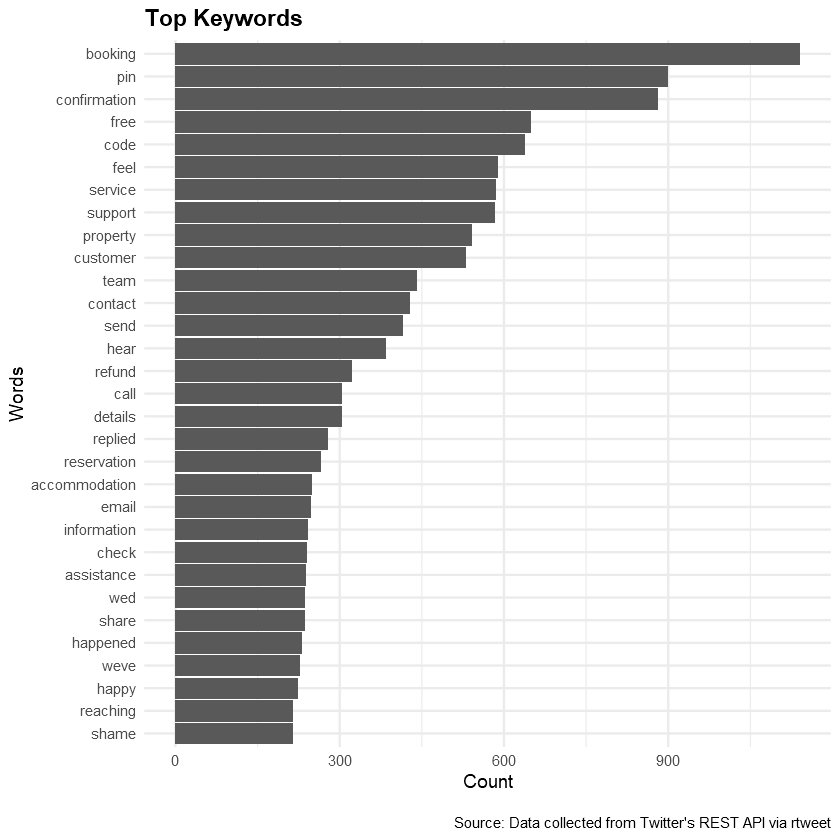

In [172]:
ggplot(Tweets_by_BK_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [173]:
wordcloud <- wordcloud2(data = Tweets_by_BK_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

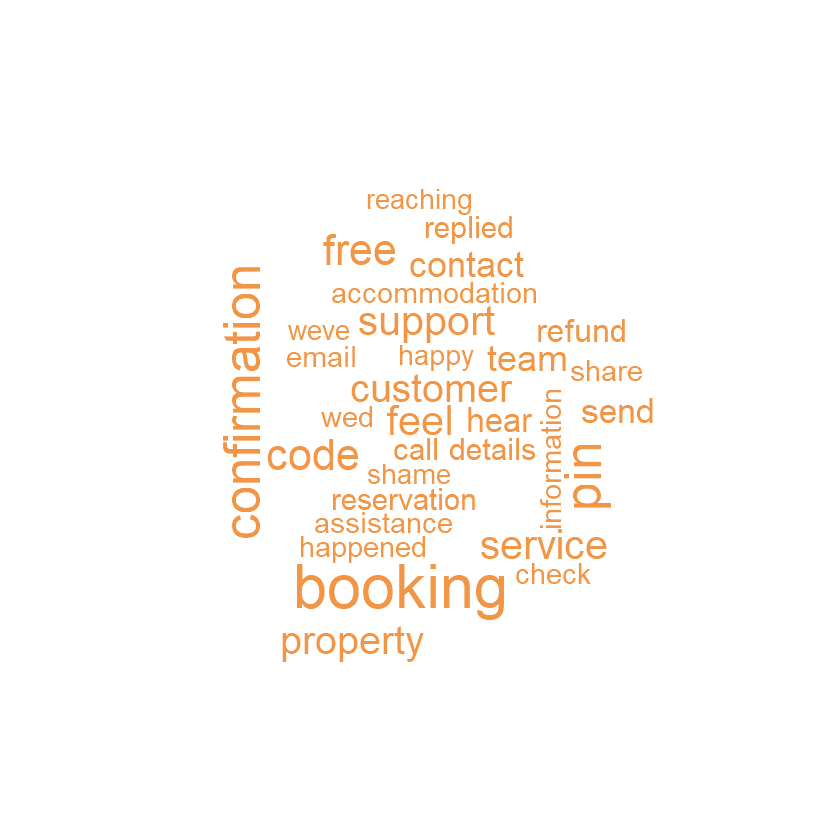

In [174]:
wordcloud(Tweets_by_BK_wordcount$word,Tweets_by_BK_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 2. Tweets made to `@bookingcom`

In [175]:
# Tokenizing and removing stopwords
Tweets_to_BK_tokenized <- Tweets_to_BK %>% filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(Tweets_to_BK_tokenized)

Joining, by = "word"



[1] 65817

In [257]:
Tweets_to_BK_tokenized <- Tweets_to_BK_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [177]:
# Remove some other elements such as # and @ signs if they might occur
Tweets_to_BK_tokenized <- filter(Tweets_to_BK_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(Tweets_to_BK_tokenized)

[1] 65817

In [178]:
# Skipping stemming as not useful in this case

In [179]:
Tweets_to_BK_wordcount <- Tweets_to_BK_tokenized %>%
                    count(word) %>%
                    filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 200) %>%
                    mutate(word2 = fct_reorder(word,n))

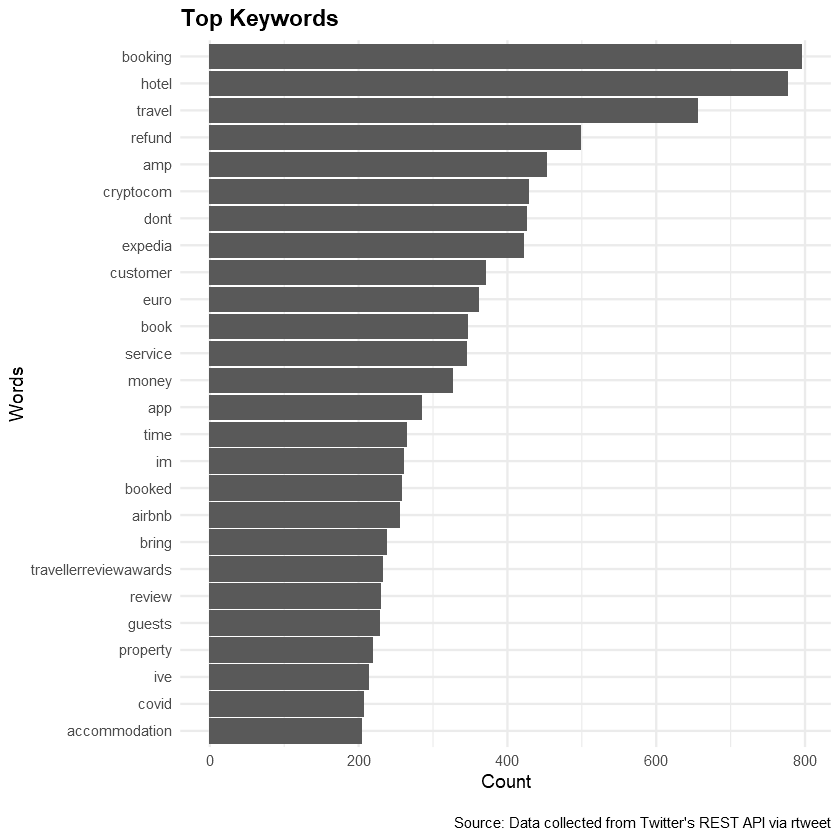

In [180]:
ggplot(Tweets_to_BK_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [181]:
wordcloud <- wordcloud2(data = Tweets_to_BK_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

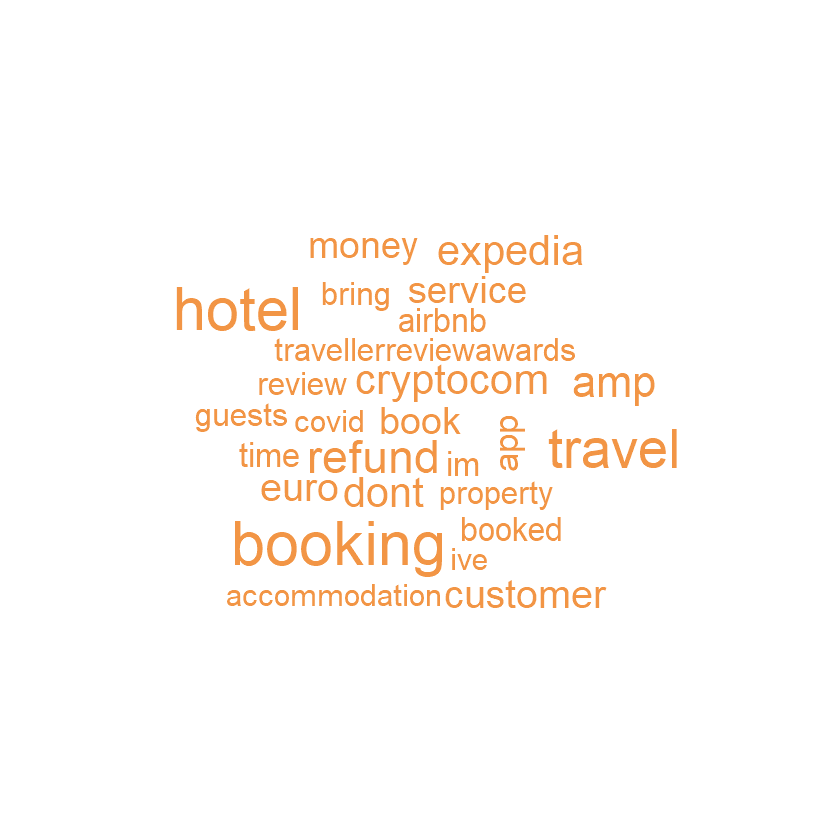

In [182]:
wordcloud(Tweets_to_BK_wordcount$word,Tweets_to_BK_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 3. Retweets to `@bookingcom`

In [183]:
# Tokenizing and removing stopwords
Retweets_to_BK_tokenized <- Retweets_to_BK %>% filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(Retweets_to_BK_tokenized)

Joining, by = "word"



[1] 24880

In [184]:
Retweets_to_BK_tokenized <- Retweets_to_BK_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [185]:
# Remove some other elements such as # and @ signs if they might occur
Retweets_to_BK_tokenized <- filter(Retweets_to_BK_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(Retweets_to_BK_tokenized)

[1] 24880

In [186]:
# Skipping stemming as not useful in this case

In [187]:
Retweets_to_BK_wordcount <- Retweets_to_BK_tokenized %>%
                    count(word) %>%
                    filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 150) %>%
                    mutate(word2 = fct_reorder(word,n))

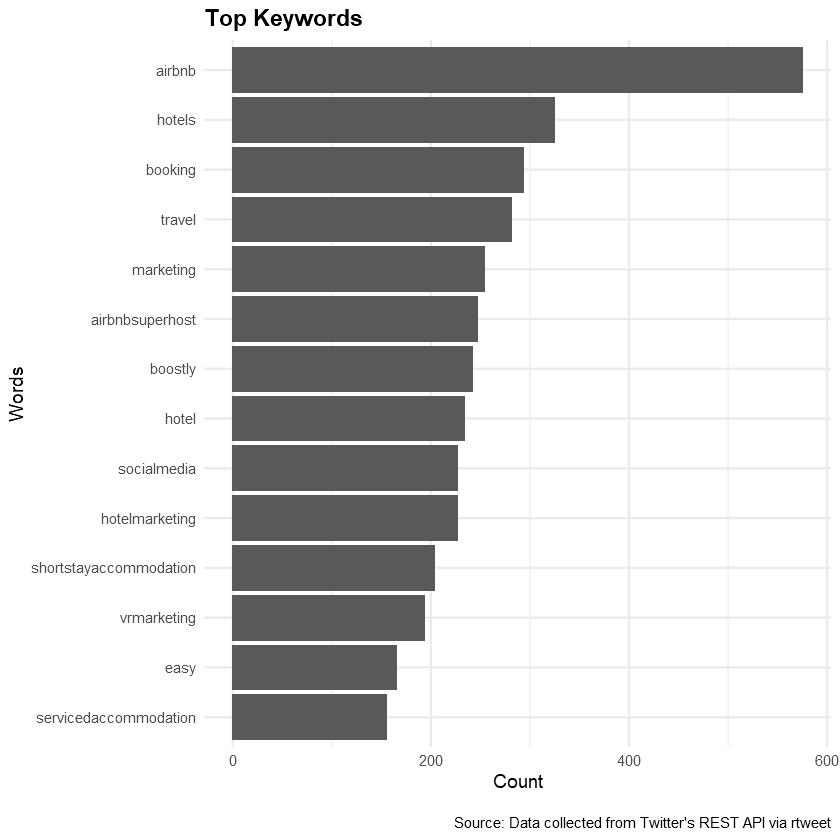

In [188]:
ggplot(Retweets_to_BK_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [189]:
wordcloud <- wordcloud2(data = Retweets_to_BK_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

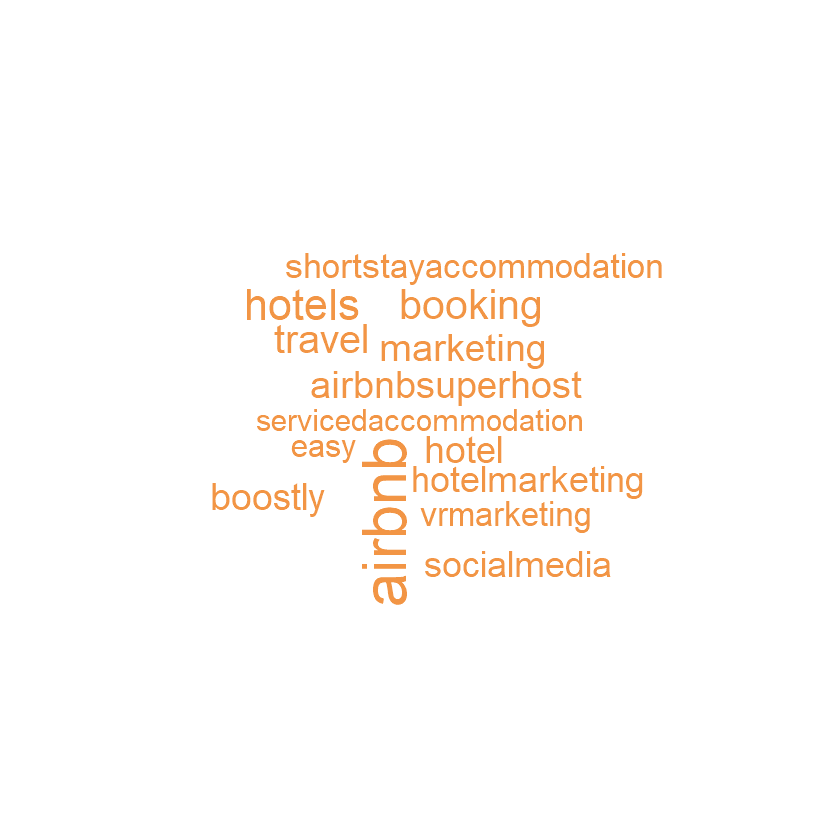

In [190]:
wordcloud(Retweets_to_BK_wordcount$word,Retweets_to_BK_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 4. Tweets made using `#bookingcom` hashtag

In [191]:
# Tokenizing and removing stopwords
hash_tokenized <- hash_full %>% filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(hash_tokenized)

Joining, by = "word"



[1] 24880

In [192]:
hash_tokenized <- hash_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [193]:
# Remove some other elements such as # and @ signs if they might occur
hash_tokenized <- filter(hash_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(hash_tokenized)

[1] 24880

In [194]:
# Skipping stemming as not useful in this case

In [195]:
hash_wordcount <- hash_tokenized %>%
                    count(word) %>%
                    filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 100) %>%
                    mutate(word2 = fct_reorder(word,n))

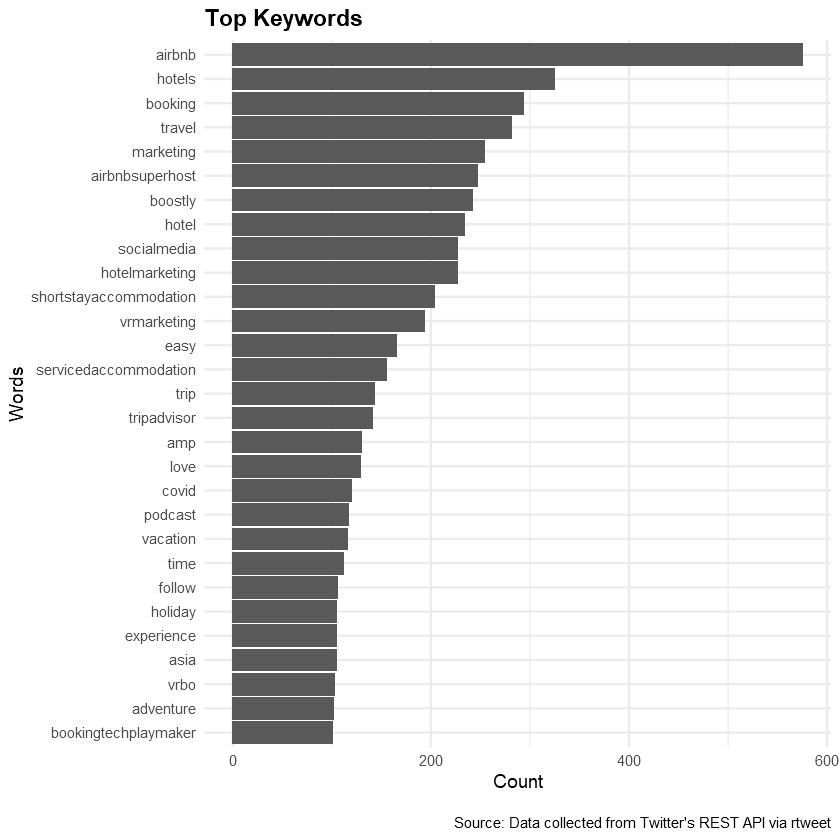

In [196]:
ggplot(hash_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [197]:
wordcloud <- wordcloud2(data = hash_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

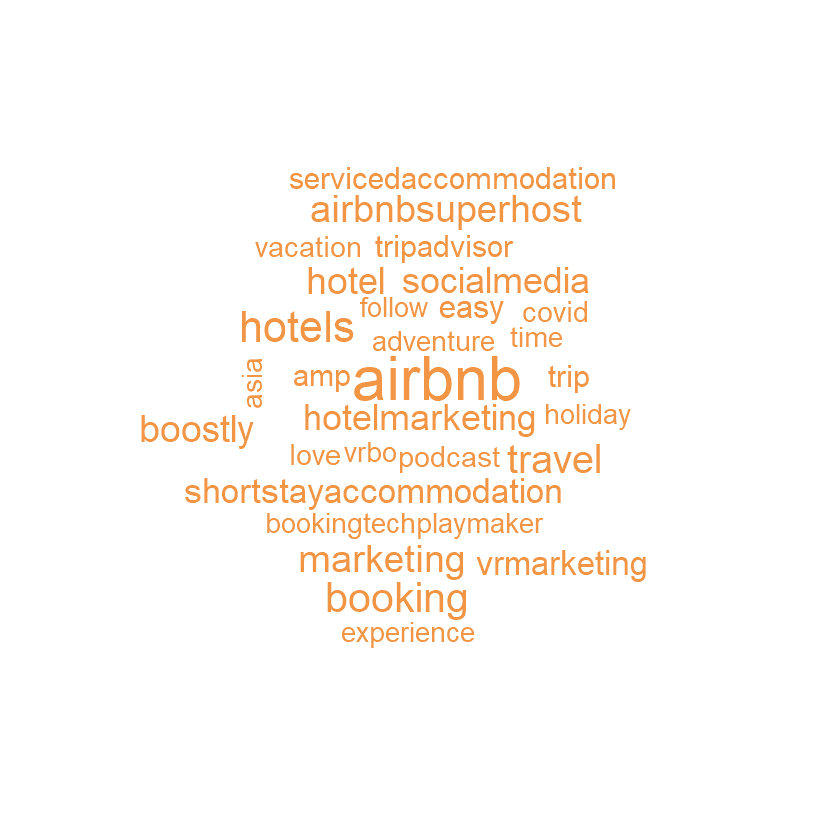

In [198]:
wordcloud(hash_wordcount$word,hash_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 5. Tweets liked by `@bookingcom`

In [199]:
# Tokenizing and removing stopwords
likes_tokenized <- booking_likes %>% 
                                filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(likes_tokenized)

Joining, by = "word"



[1] 12495

In [200]:
likes_tokenized <- likes_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [201]:
# Remove some other elements such as # and @ signs if they might occur
likes_tokenized <- filter(likes_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(likes_tokenized)

[1] 12495

In [202]:
# Skipping stemming as not useful in this case

In [203]:
likes_wordcount <- likes_tokenized %>%
                    count(word) %>%
                   filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 50) %>%
                    mutate(word2 = fct_reorder(word,n))

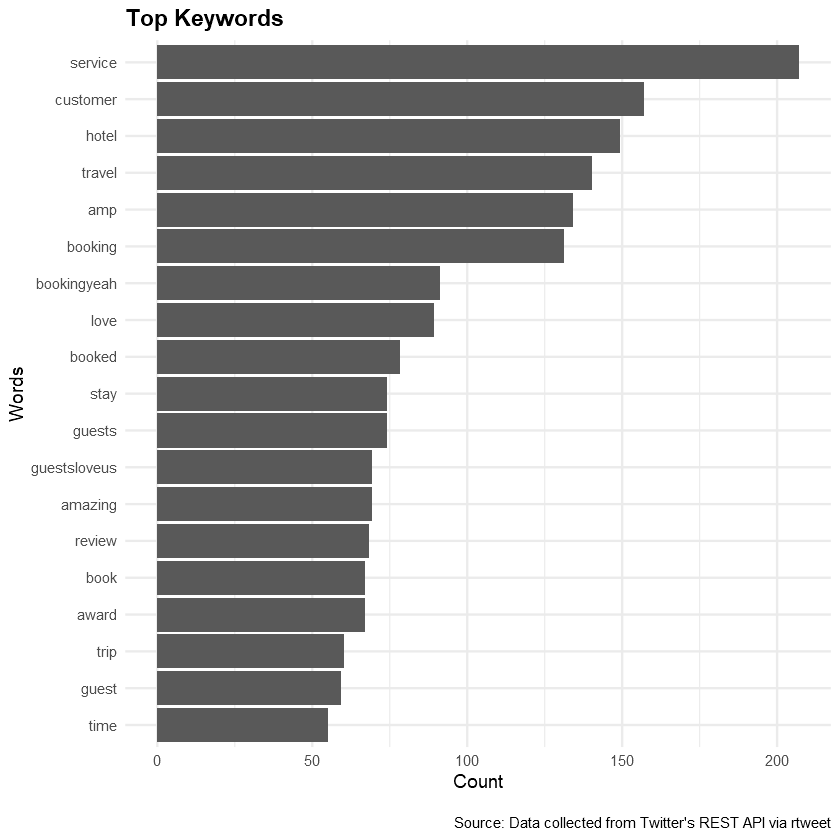

In [204]:
ggplot(likes_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [205]:
wordcloud <- wordcloud2(data = likes_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

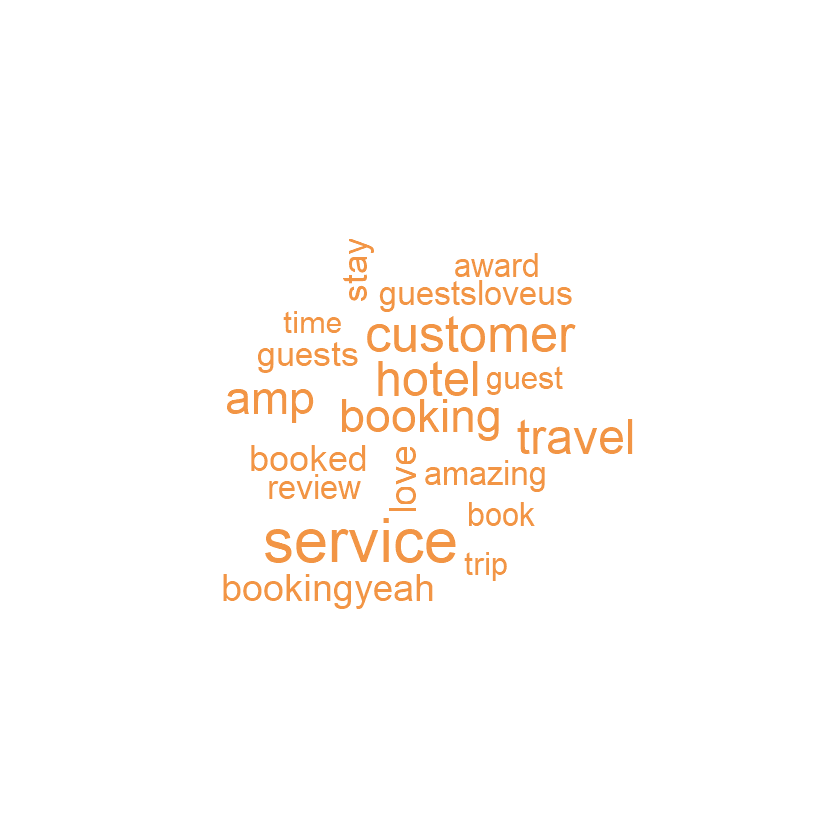

In [206]:
wordcloud(likes_wordcount$word,likes_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 6. Followers of @bookingcom

In [207]:
# Tokenizing and removing stopwords
followers_tokenized <- new_followers_info %>% 
                                filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = description, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(followers_tokenized)

Joining, by = "word"



[1] 203672

In [208]:
followers_tokenized <- followers_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [209]:
# Remove some other elements such as # and @ signs if they might occur
followers_tokenized <- filter(followers_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(followers_tokenized)

[1] 203672

In [210]:
# Skipping stemming as not useful in this case

In [211]:
followers_wordcount <- followers_tokenized %>%
                    count(word) %>%
                   filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 500) %>%
                    mutate(word2 = fct_reorder(word,n))

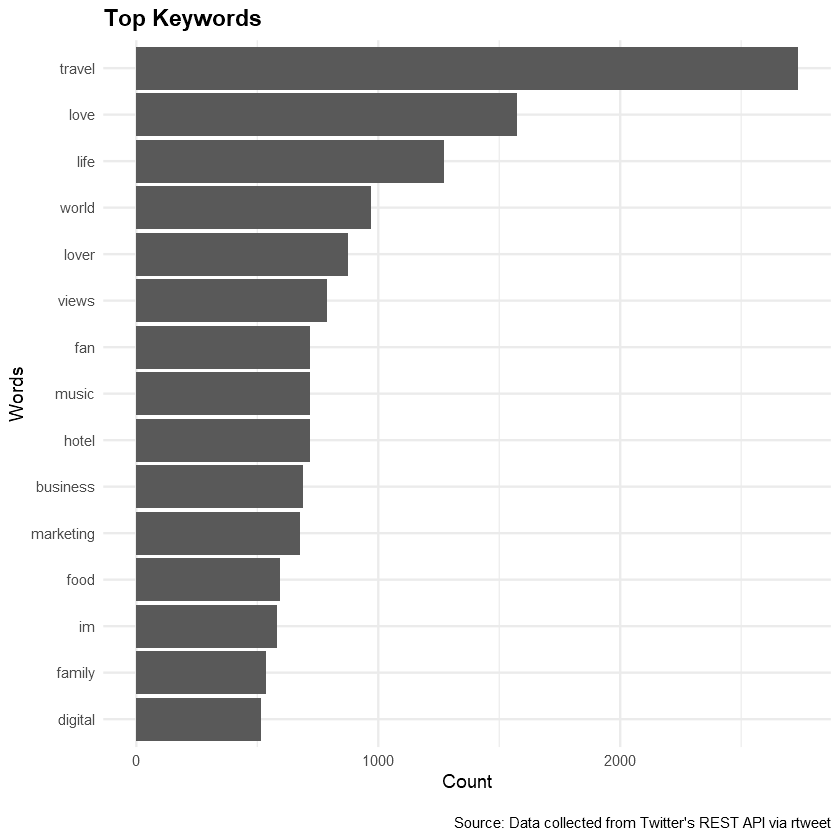

In [212]:
ggplot(followers_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [213]:
wordcloud <- wordcloud2(data = followers_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

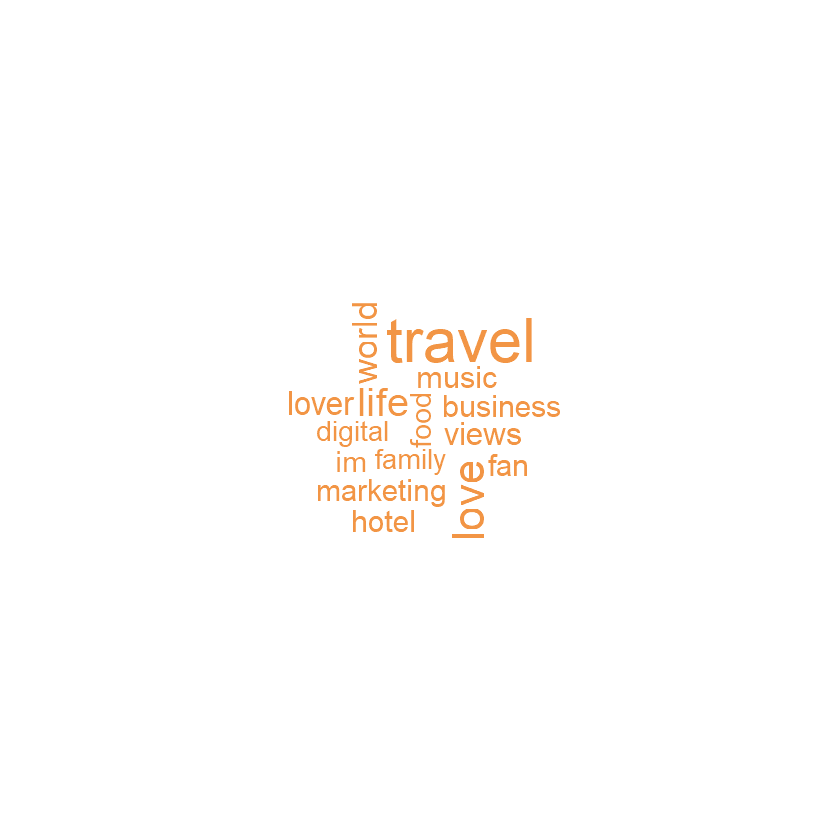

In [214]:
wordcloud(followers_wordcount$word,followers_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 7. Description of Subscribers associated with `@bookingcom` lists

In [215]:
# Tokenizing and removing stopwords
final_lists_sub_tweets_tokenized <- final_lists_sub_tweets %>% filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = description, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(final_lists_sub_tweets_tokenized)


Joining, by = "word"



[1] 10946

In [217]:
final_lists_sub_tweets_tokenized <- final_lists_sub_tweets_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [218]:
# Remove some other elements such as # and @ signs if they might occur
final_lists_sub_tweets_tokenized <- filter(final_lists_sub_tweets_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(final_lists_sub_tweets_tokenized)

[1] 10946

In [219]:
final_lists_sub_tweets_wordcount <- final_lists_sub_tweets_tokenized %>%
                    count(word) %>%
                    filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 50) %>%
                    mutate(word2 = fct_reorder(word,n))

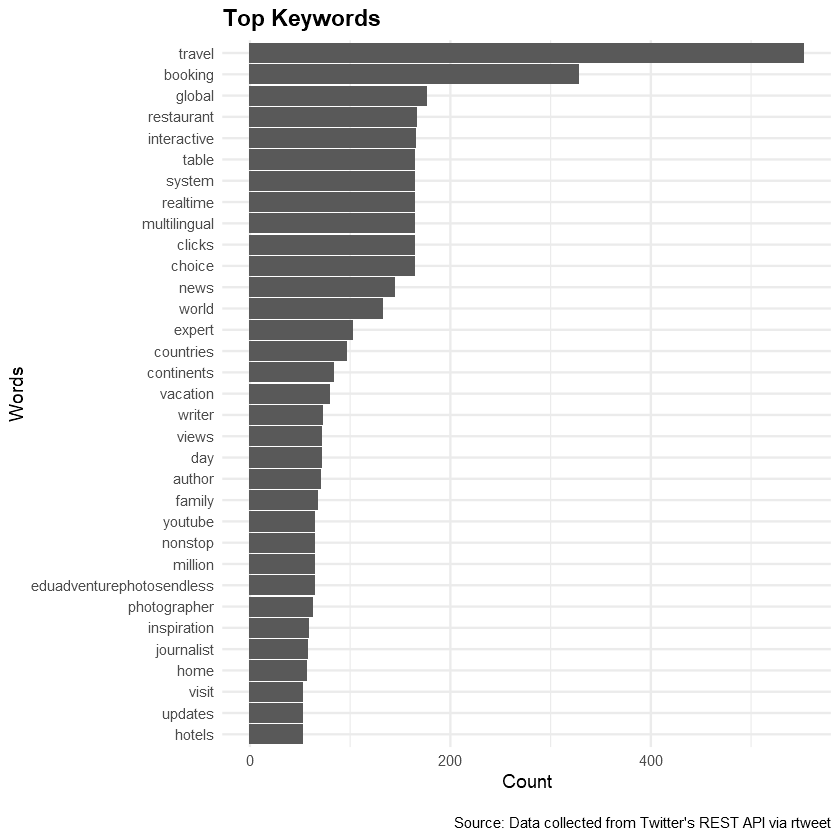

In [220]:
ggplot(final_lists_sub_tweets_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [221]:
wordcloud <- wordcloud2(data = final_lists_sub_tweets_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

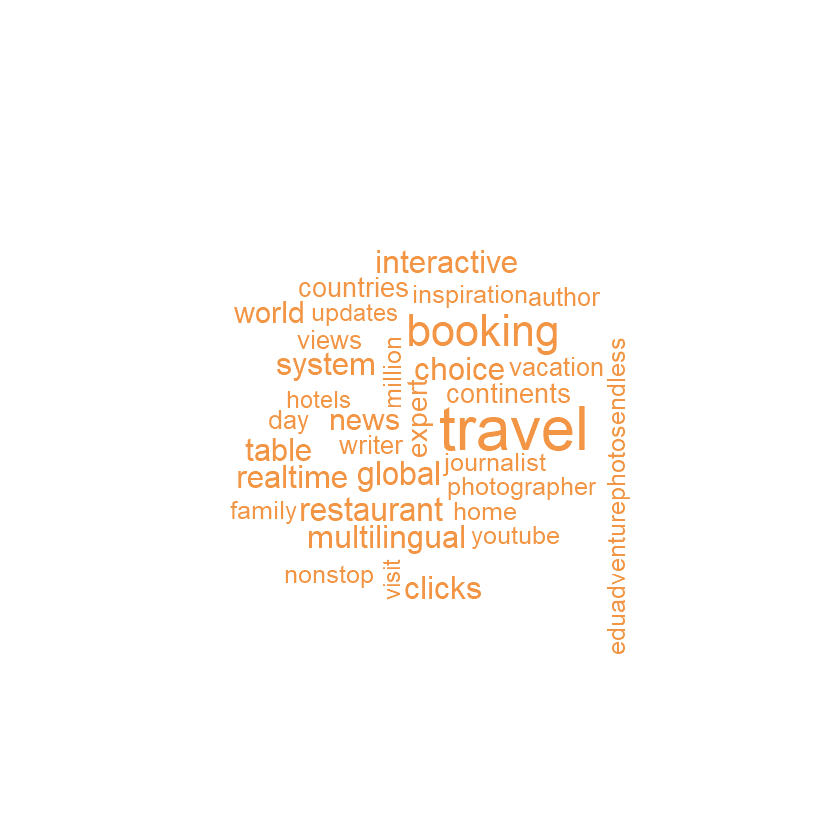

In [222]:
wordcloud(final_lists_sub_tweets_wordcount$word,final_lists_sub_tweets_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 8. Tweets made with `booking.com` as keyword

In [223]:
# Tokenizing and removing stopwords
bkgtweets_tokenized <- bkgtweets %>% 
                                filter(lang == 'en') %>%
                                unnest_tokens(output = "word", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "words", # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) %>% # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
                                anti_join(stop_words2)
nrow(bkgtweets_tokenized)

Joining, by = "word"



[1] 5937

In [224]:
bkgtweets_tokenized <- bkgtweets_tokenized %>% group_by(status_id) %>% 
                            mutate(prevword = lag(x=word,n=1)) %>% 
                            ungroup()

In [225]:
# Remove some other elements such as # and @ signs if they might occur
bkgtweets_tokenized <- filter(bkgtweets_tokenized, substr(word, 1, 1) != '#', 
                         substr(word, 1, 1) != '@')
nrow(bkgtweets_tokenized)

[1] 5937

In [226]:
# Skipping stemming as not useful in this case

In [227]:
bkgtweets_wordcount <- bkgtweets_tokenized %>%
                    count(word) %>%
                   filter(word != "bookingcom") %>% # filtering the word bookingcom
                    filter (n > 50) %>%
                    mutate(word2 = fct_reorder(word,n))

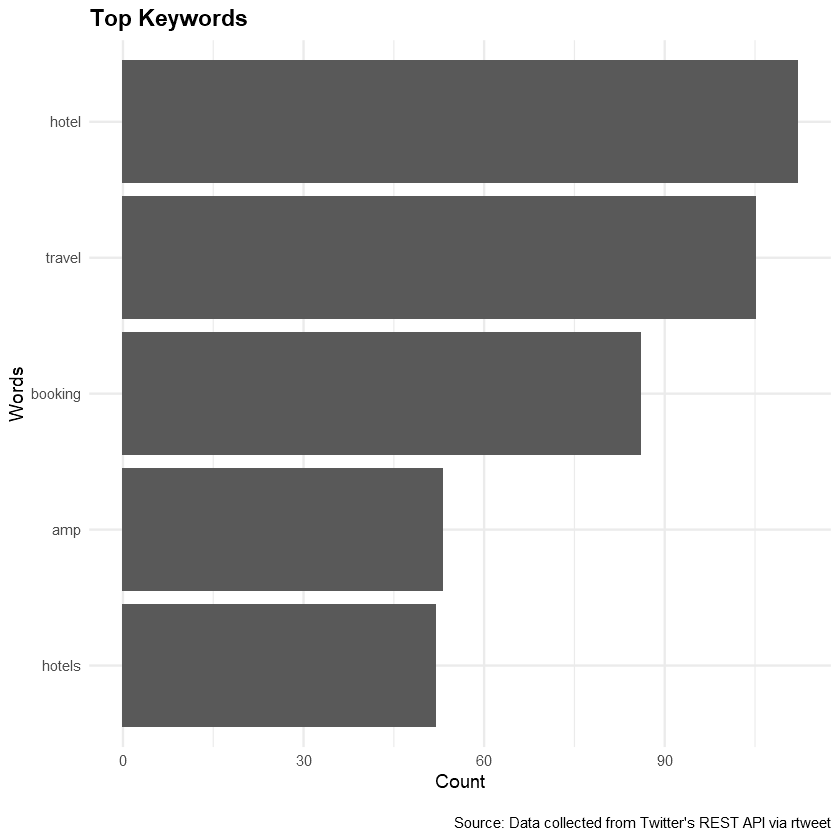

In [228]:
ggplot(bkgtweets_wordcount, aes(x = word2, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Top Keywords",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Words",
        y = "Count")

In [229]:
wordcloud <- wordcloud2(data = bkgtweets_wordcount[,1:2], minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

HTML widgets cannot be represented in plain text (need html)

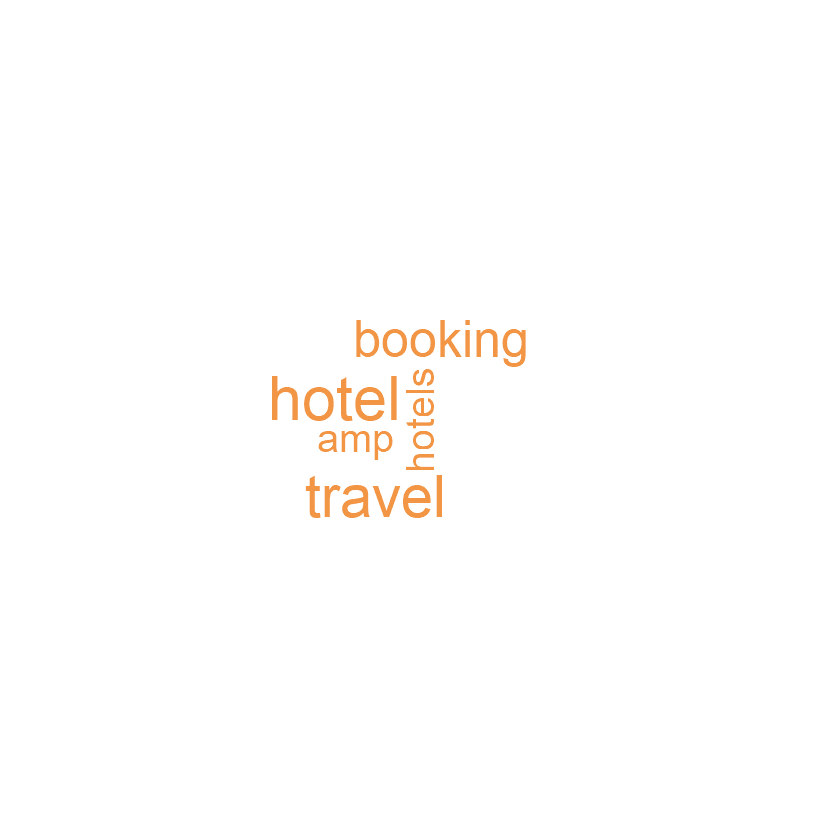

In [230]:
wordcloud(bkgtweets_wordcount$word,bkgtweets_wordcount$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

## 7-B Bigrams

##### 1. Tweets made by `@bookingcom`

In [ ]:

# Tokenizing and removing stopwords
Tweets_by_BK_tokenized_bi <- Tweets_by_BK %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(Tweets_by_BK_tokenized_bi)

In [ ]:
Tweets_by_BK_bi <- Tweets_by_BK_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = Tweets_by_BK_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(Tweets_by_BK_bi$bigram,Tweets_by_BK_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 2. Tweets made to `@bookingcom`

In [ ]:
Tweets_to_BK_tokenized_bi <- Tweets_to_BK %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(Tweets_to_BK_tokenized_bi)

In [ ]:
Tweets_to_BK_bi <- Tweets_to_BK_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = Tweets_to_BK_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(Tweets_to_BK_bi$bigram,Tweets_to_BK_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 3. Retweets to `@bookingcom`

In [ ]:
Retweets_to_BK_tokenized_bi <- Retweets_to_BK %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(Retweets_to_BK_tokenized_bi)

In [ ]:
Retweets_to_BK_bi <- Retweets_to_BK_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = Retweets_to_BK_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(Retweets_to_BK_bi$bigram,Retweets_to_BK_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 4. Tweets made using `#bookingcom` hashtag

In [ ]:
# Tokenizing and removing stopwords
hash_tokenized_bi <- hash_full %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(hash_tokenized_bi)

In [ ]:
hash_bi <- hash_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = hash_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(hash_bi$bigram,hash_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 5. Tweets liked by `@bookingcom`

In [ ]:
# Tokenizing and removing stopwords
likes_tokenized_bi <- booking_likes %>% filter(lang == 'en') %>%
                                                unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(likes_tokenized_bi)

In [ ]:
likes_bi <- likes_tokenized_bi %>% 
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = likes_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(likes_bi$bigram,likes_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 6. Followers of @bookingcom

In [ ]:


# Tokenizing and removing stopwords
followers_info_tokenized_bi <- new_followers_info %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = description, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(followers_info_tokenized_bi)


In [ ]:
followers_info_bi <- followers_info_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = followers_info_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(followers_info_bi$bigram,followers_info_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 7. Description of Subscribers associated with `@bookingcom` lists

In [ ]:

# Tokenizing and removing stopwords
final_lists_sub_tweets_tokenized_bi <- final_lists_sub_tweets %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = description, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(final_lists_sub_tweets_tokenized_bi)


In [ ]:
final_lists_sub_tweets_bi <- final_lists_sub_tweets_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = final_lists_sub_tweets_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(final_lists_sub_tweets_bi$bigram,final_lists_sub_tweets_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

##### 8. Tweets made with `booking.com` as keyword

In [ ]:
# Tokenizing and removing stopwords
bkgtweets_tokenized_bi <- bkgtweets %>% unnest_tokens(output = "bigram", # how should the new column be named?
                                                    input = text, # where can we find the text? 
                                                    token = "ngrams", n=2, # which tokenization scheme should we follow?
                                                    drop=FALSE,to_lower=TRUE) # drop=FALSE specifies that we want to keep our text; to_lower puts everyting to lowercase
nrow(bkgtweets_tokenized_bi)

In [ ]:
bkgtweets_bi <- bkgtweets_tokenized_bi %>% 
    filter(!is.na(bigram)) %>%
    count(bigram)

In [ ]:
wordcloud <- wordcloud2(data = bkgtweets_bi, minRotation = 0, maxRotation = 0, ellipticity = 0.6)
wordcloud

In [ ]:
wordcloud(bkgtweets_bi$bigram,bkgtweets_bi$n,
          max.words=50,
          scale=c(3,1),
         colors = "#F29545")

# Part 8 Sentiment Analysis

## 8-A Using `bing` dictionary

##### 1. Tweets made by `@bookingcom`

In [248]:
negationWords <- get_stopwords()[c(81:98,165:167),"word"]

In [231]:
Tweets_by_BK_bing <- Tweets_by_BK_tokenized %>%
    inner_join(get_sentiments("bing"))

Joining, by = "word"



In [249]:
for (x in (1:nrow(Tweets_by_BK_bing))){
    if (Tweets_by_BK_bing$prevword[x] %in% negationWords$word){
        print(x)
        if (Tweets_by_BK_bing$sentiment[x]=='negative'){
            Tweets_by_BK_bing$sentiment[x]=='positive'
        } else if (Tweets_by_BK_bing$sentiment[x]=='positive'){
            Tweets_by_BK_bing$sentiment[x]=='negative'
}
}
}

In [251]:
Tweets_by_BK_bing <- Tweets_by_BK_bing %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

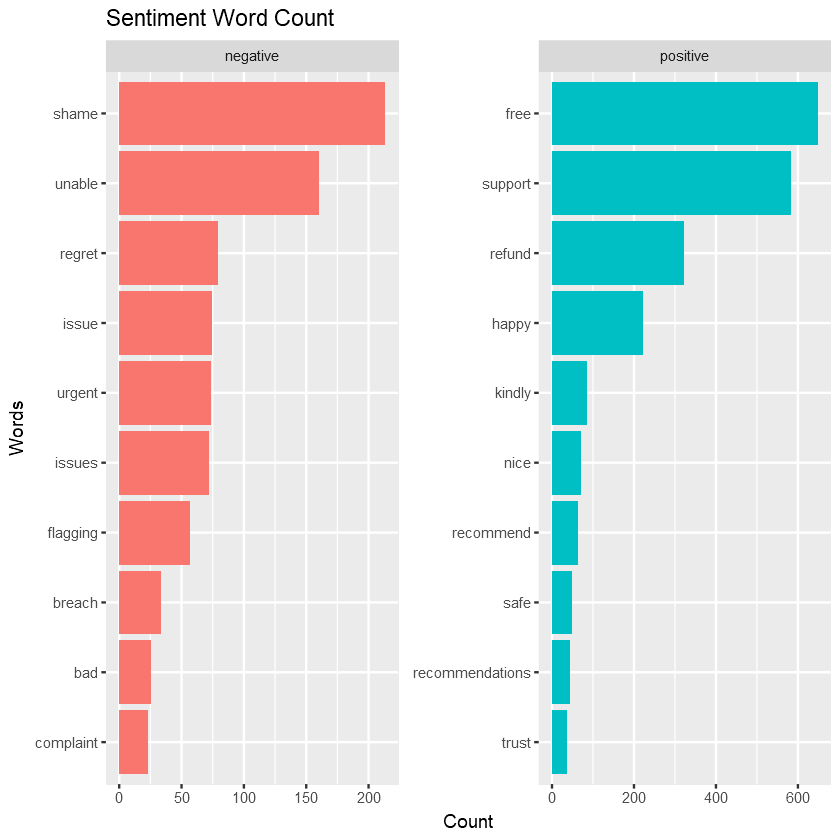

In [252]:
ggplot(Tweets_by_BK_bing, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 2. Tweets made to `@bookingcom`

In [258]:
Tweets_to_BK_bing <- Tweets_to_BK_tokenized %>%
    inner_join(get_sentiments("bing"))

Joining, by = "word"



In [263]:
for (x in (1:nrow(Tweets_to_BK_bing))){
    if (Tweets_to_BK_bing$prevword[x] %in% negationWords$word){
        print(x)
        if (Tweets_to_BK_bing$sentiment[x]=='negative'){
            Tweets_to_BK_bing$sentiment[x]=='positive'
        } else if (Tweets_to_BK_bing$sentiment[x]=='positive'){
            Tweets_to_BK_bing$sentiment[x]=='negative'
}
}
}

In [264]:
Tweets_to_BK_bing <- Tweets_to_BK_bing %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

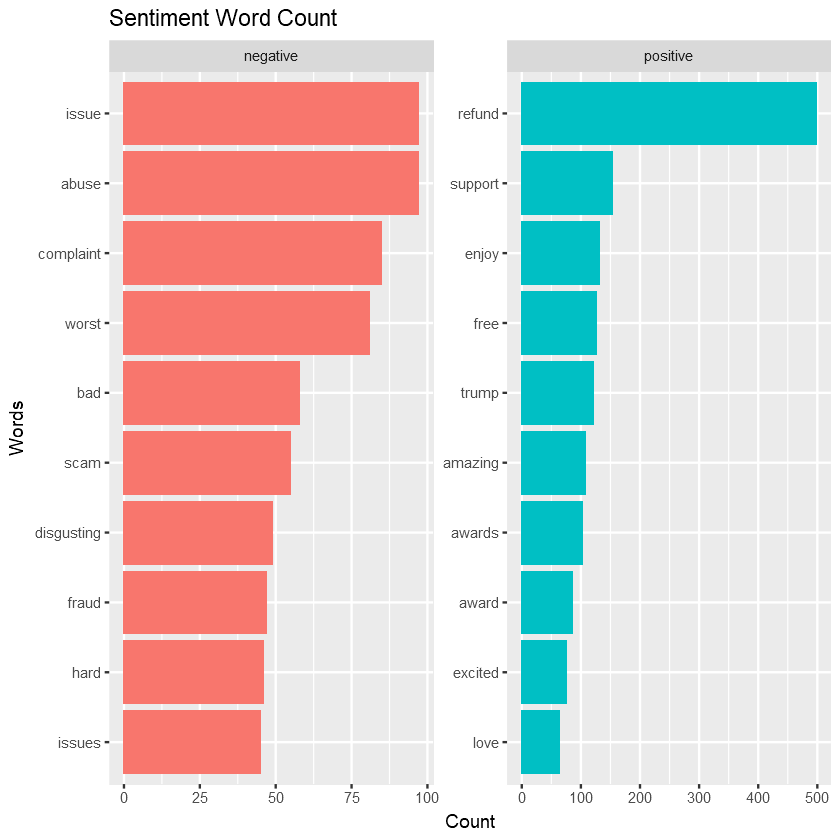

In [265]:
ggplot(Tweets_to_BK_bing, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 3. Retweets to `@bookingcom`

In [266]:
Retweets_to_BK_bing <- Retweets_to_BK_tokenized %>%
    inner_join(get_sentiments("bing"))

Joining, by = "word"



In [268]:
for (x in (1:nrow(Retweets_to_BK_bing))){
    if (Retweets_to_BK_bing$prevword[x] %in% negationWords$word){
        print(x)
        if (Retweets_to_BK_bing$sentiment[x]=='negative'){
            Retweets_to_BK_bing$sentiment[x]=='positive'
        } else if (Retweets_to_BK_bing$sentiment[x]=='positive'){
            Retweets_to_BK_bing$sentiment[x]=='negative'
}
}
}

In [269]:
Retweets_to_BK_bing <- Retweets_to_BK_bing %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

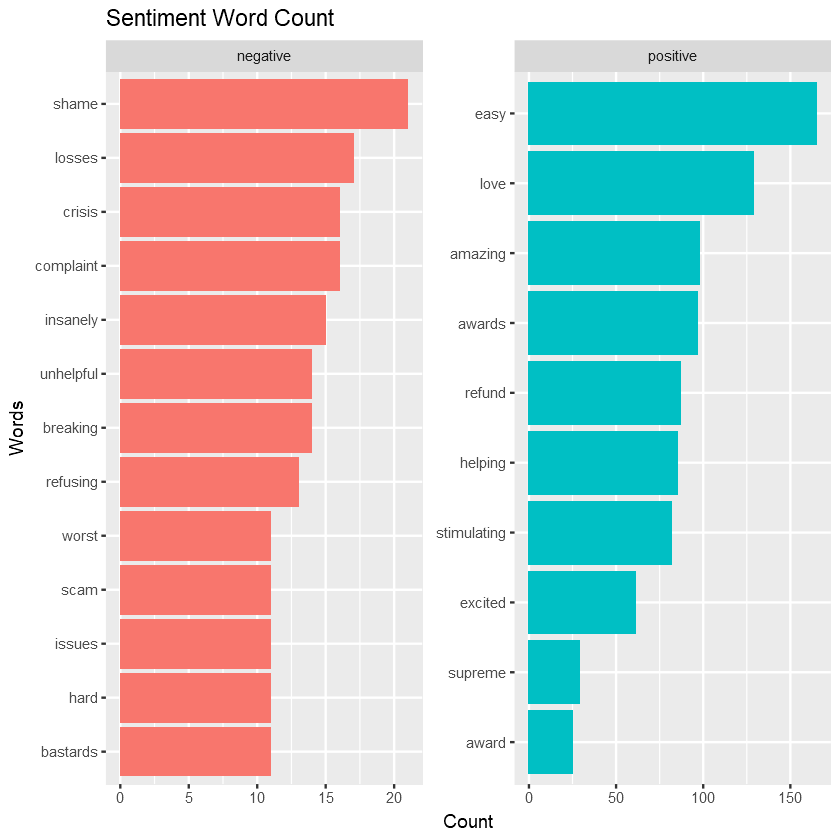

In [270]:
ggplot(Retweets_to_BK_bing, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 4. Tweets made using `#bookingcom` hashtag

In [271]:
hash_bing <- hash_tokenized %>%
    inner_join(get_sentiments("bing"))

Joining, by = "word"



In [273]:
for (x in (1:nrow(hash_bing))){
    if (hash_bing$prevword[x] %in% negationWords$word){
        print(x)
        if (hash_bing$sentiment[x]=='negative'){
            hash_bing$sentiment[x]=='positive'
        } else if (hash_bing$sentiment[x]=='positive'){
            hash_bing$sentiment[x]=='negative'
}
}
}

In [274]:
hash_bing <- hash_bing %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

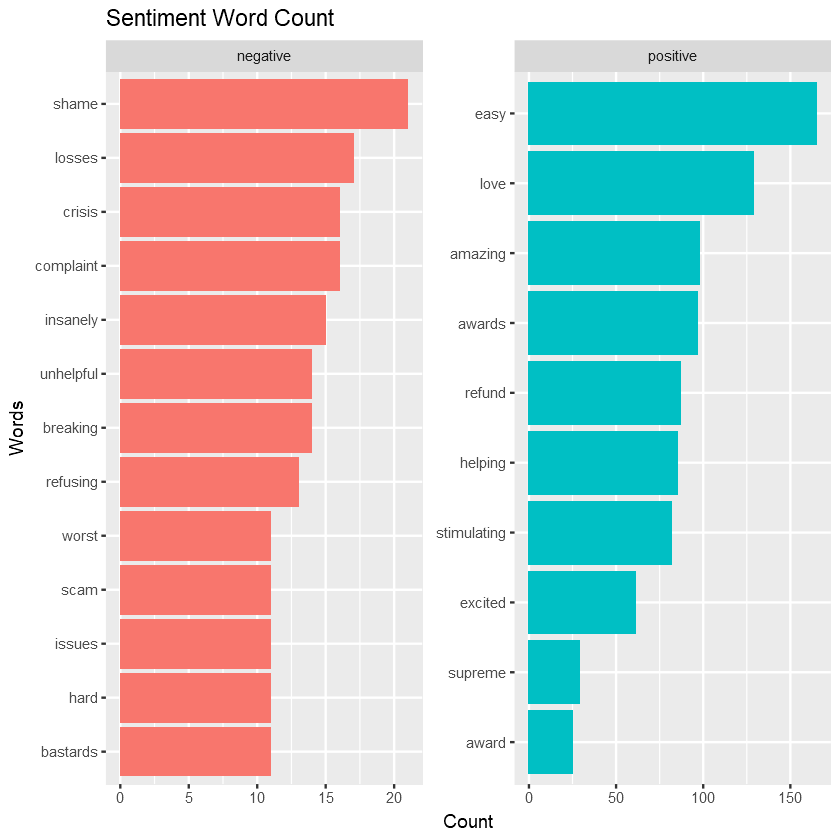

In [275]:
ggplot(hash_bing, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 5. Tweets liked by `@bookingcom`

In [276]:
likes_bing <- likes_tokenized %>%
    inner_join(get_sentiments("bing"))

Joining, by = "word"



In [278]:
for (x in (1:nrow(likes_bing))){
    if (likes_bing$prevword[x] %in% negationWords$word){
        print(x)
        if (likes_bing$sentiment[x]=='negative'){
            likes_bing$sentiment[x]=='positive'
        } else if (likes_bing$sentiment[x]=='positive'){
            likes_bing$sentiment[x]=='negative'
}
}
}

In [279]:
likes_bing <- likes_bing %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

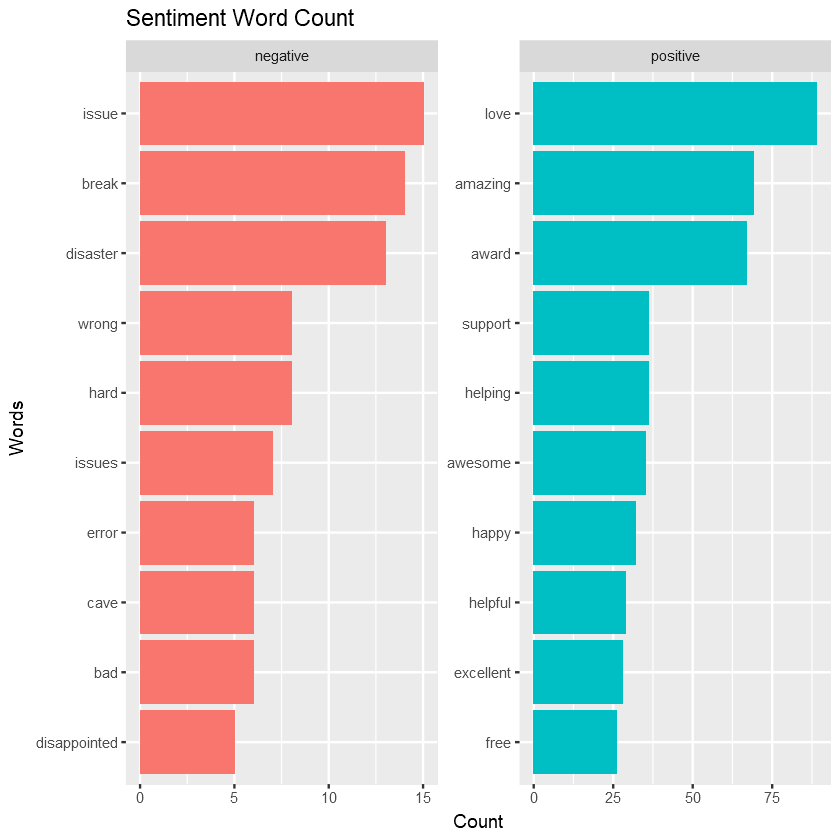

In [280]:
ggplot(likes_bing, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 6. Followers of @bookingcom

**Not Applicable**

##### 7. Tweets of Subscribers associated with `@bookingcom` lists

**Not Applicable**

##### 8. Tweets made with `booking.com` as keyword

In [281]:
bkgtweets_bing <- bkgtweets_tokenized %>%
    inner_join(get_sentiments("bing"))

Joining, by = "word"



In [283]:
for (x in (1:nrow(bkgtweets_bing))){
    if (bkgtweets_bing$prevword[x] %in% negationWords$word){
        print(x)
        if (bkgtweets_bing$sentiment[x]=='negative'){
            bkgtweets_bing$sentiment[x]=='positive'
        } else if (likes_bing$sentiment[x]=='positive'){
            bkgtweets_bing$sentiment[x]=='negative'
}
}
}

In [284]:
bkgtweets_bing <- bkgtweets_bing %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

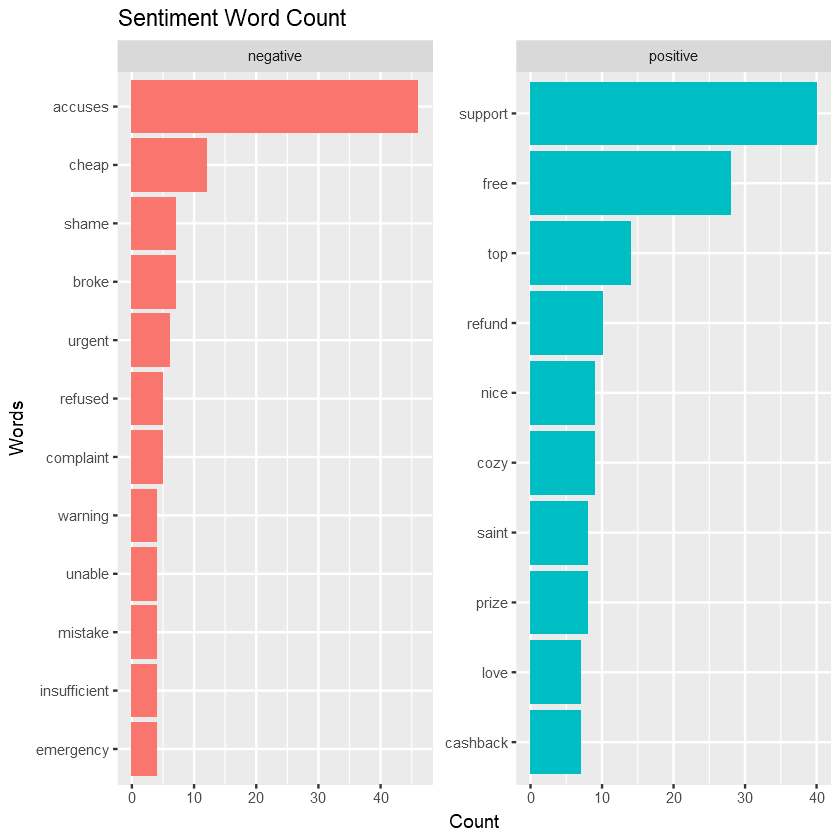

In [285]:
ggplot(bkgtweets_bing, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

## 8-B Using `afinn` dictionary

Number of Positive vs Negative Tweets

In [286]:
# Loading the afinn dictionary
# textdata::lexicon_afinn(manual_download = TRUE)

##### 1. Tweets made by `@bookingcom`

In [287]:
library("textdata")

In [288]:
Tweets_by_BK_afinn <- Tweets_by_BK_tokenized %>%
    inner_join(get_sentiments("afinn"))

Do you want to download:
 Name: AFINN-111 
 URL: http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010 
 License: Open Database License (ODbL) v1.0 
 Size: 78 KB (cleaned 59 KB) 
 Download mechanism: https 


ERROR: Error in menu(choices = c("Yes", "No"), title = title): menu() cannot be used non-interactively


In [ ]:
for (x in (1:nrow(Tweets_by_BK_afinn))){
    if (Tweets_by_BK_afinn$prevword[x] %in% negationWords$word){
        print(x)
        if (Tweets_by_BK_afinn$sentiment[x]=='negative'){
            Tweets_by_BK_afinn$sentiment[x]=='positive'
        } else if (Tweets_by_BK_afinn$sentiment[x]=='positive'){
            Tweets_by_BK_afinng$sentiment[x]=='negative'
}
}
}

In [ ]:
Tweets_by_BK_afinn_sent <- Tweets_by_BK_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative"))) %>%
            count(sentiment)

In [ ]:
ggplot(Tweets_by_BK_afinn_sent, aes(x = sentiment, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Sentiment Distribution from Tweets with #Bookingcom hashtags",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Type",
        y = "Count")

##### 2. Tweets made to `@bookingcom`

In [ ]:
Tweets_to_BK_afinn <- Tweets_to_BK_tokenized %>%
    inner_join(get_sentiments("afinn"))

In [ ]:
for (x in (1:nrow(Tweets_to_BK_afinn))){
    if (Tweets_to_BK_afinn$prevword[x] %in% negationWords$word){
        print(x)
        if (Tweets_to_BK_afinn$sentiment[x]=='negative'){
            Tweets_to_BK_afinn$sentiment[x]=='positive'
        } else if (Tweets_to_BK_afinn$sentiment[x]=='positive'){
            Tweets_to_BK_afinn$sentiment[x]=='negative'
}
}
}

In [ ]:
Tweets_to_BK_afinn_sent <- Tweets_to_BK_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative"))) %>%
            count(sentiment)

In [ ]:
ggplot(Tweets_to_BK_afinn_sent, aes(x = sentiment, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Sentiment Distribution from Tweets with #Bookingcom hashtags",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Type",
        y = "Count")

##### 3. Retweets to `@bookingcom`

In [ ]:
Retweets_to_BK_afinn <- Retweets_to_BK_tokenized %>%
    inner_join(get_sentiments("afinn"))

In [ ]:
for (x in (1:nrow(Retweets_to_BK_afinn))){
    if (Retweets_to_BK_afinn$prevword[x] %in% negationWords$word){
        print(x)
        if (Retweets_to_BK_afinn$sentiment[x]=='negative'){
            Retweets_to_BK_afinn$sentiment[x]=='positive'
        } else if (Retweets_to_BK_afinn$sentiment[x]=='positive'){
            Retweets_to_BK_afinn$sentiment[x]=='negative'
}
}
}

In [ ]:
Retweets_to_BK_afinn_sent <- Retweets_to_BK_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative"))) %>%
            count(sentiment)

In [ ]:
ggplot(Retweets_to_BK_afinn_sent, aes(x = sentiment, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Sentiment Distribution from Tweets with #Bookingcom hashtags",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Type",
        y = "Count")

##### 4. Tweets made using `#bookingcom` hashtag

In [ ]:
hash_afinn <- hash_tokenized %>%
    inner_join(get_sentiments("afinn"))

In [ ]:
for (x in (1:nrow(hash_afinn))){
    if (hash_afinn$prevword[x] %in% negationWords$word){
        print(x)
        if (hash_afinn$sentiment[x]=='negative'){
            hash_afinn$sentiment[x]=='positive'
        } else if (hash_afinn$sentiment[x]=='positive'){
            hash_afinn$sentiment[x]=='negative'
}
}
}

In [ ]:
hash_afinn_sent <- hash_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative"))) %>%
            count(sentiment)

In [ ]:
hash_afinn_sent

In [ ]:
ggplot(hash_afinn_sent, aes(x = sentiment, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Sentiment Distribution from Tweets with #Bookingcom hashtags",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Type",
        y = "Count")

In [ ]:
hash_afinn_sent2 <- hash_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            count(value)

In [ ]:
ggplot(hash_afinn_sent2, aes(x = value, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Top Keywords - Distribution",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Value",
        y = "Count")

In [ ]:
hash_afinn_sent3 <- hash_afinn %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative")))

In [ ]:
hash_afinn_sent3 <- hash_afinn_sent3 %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

In [ ]:
ggplot(hash_afinn_sent3, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 5. Tweets liked by `@bookingcom`

In [ ]:
likes_afinn <- likes_tokenized %>%
    inner_join(get_sentiments("afinn"))

In [ ]:
for (x in (1:nrow(likes_afinn))){
    if (likes_afinn$prevword[x] %in% negationWords$word){
        print(x)
        if (likes_afinn$sentiment[x]=='negative'){
            likes_afinn$sentiment[x]=='positive'
        } else if (likes_afinn$sentiment[x]=='positive'){
            likes_afinn$sentiment[x]=='negative'
}
}
}

In [ ]:
likes_afinn_sent <- likes_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative"))) %>%
            count(sentiment)

In [ ]:
likes_afinn_sent

In [ ]:
ggplot(likes_afinn_sent, aes(x = sentiment, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Sentiment Distribution from Tweets with #Bookingcom hashtags",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Type",
        y = "Count")

In [ ]:
likes_afinn_sent2 <- likes_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            count(value)

In [ ]:
ggplot(likes_afinn_sent2, aes(x = value, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Top Keywords - Distribution",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Value",
        y = "Count")

In [ ]:
likes_afinn_sent3 <- likes_afinn %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative")))

In [ ]:
likes_afinn_sent3 <- likes_afinn_sent3 %>%
        count(word, sentiment) %>%
        group_by(sentiment) %>%
        top_n(10, n) %>%
        ungroup() %>%
        mutate(word2 = fct_reorder(word, n))

In [ ]:
ggplot(likes_afinn_sent3, aes(x=word2, y=n, fill=sentiment)) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ sentiment, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 6. Followers of @bookingcom

**Not Applicable**

##### 7. Tweets of Subscribers associated with `@bookingcom` lists

**Not Applicable**

##### 8. Tweets made with `booking.com` as keyword

In [ ]:
bkgtweets_afinn <- bkgtweets_tokenized %>%
    inner_join(get_sentiments("afinn"))

In [ ]:
for (x in (1:nrow(bkgtweets_afinn))){
    if (bkgtweets_afinn$prevword[x] %in% negationWords$word){
        print(x)
        if (bkgtweets_afinn$sentiment[x]=='negative'){
            bkgtweets_afinn$sentiment[x]=='positive'
        } else if (bkgtweets_afinn$sentiment[x]=='positive'){
            bkgtweets_afinn$sentiment[x]=='negative'
}
}
}

In [ ]:
bkgtweets_afinn <- Tweets_to_BK_afinn %>%
            group_by(status_id) %>%
            summarize(value = sum(value)) %>%
            mutate(sentiment = ifelse(value == 0, "Neutral", ifelse(value > 0, "Positive", "Negative"))) %>%
            count(sentiment)

In [ ]:
ggplot(bkgtweets_afinn, aes(x = sentiment, y=n)) +
    theme_minimal() +
    theme(plot.title = ggplot2::element_text(face = "bold")) +
    geom_col() +
    labs(
        title = "Sentiment Distribution from Tweets with #Bookingcom hashtags",
        caption = "\nSource: Data collected from Twitter's REST API via rtweet",
        x = "Sentiment Type",
        y = "Count")

# Part 9 Topic Modeling

##### 1. Tweets made by `@bookingcom`

In [ ]:
Tweets_by_BK_dtm <- Tweets_by_BK_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
Tweets_by_BK_lda_2 <- LDA(Tweets_by_BK_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
Tweets_by_BK_lda_topics_2 <- Tweets_by_BK_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
Tweets_by_BK_topics_2 <- Tweets_by_BK_lda_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(Tweets_by_BK_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 2. Tweets made to `@bookingcom`

In [ ]:
Tweets_to_BK_dtm <- Tweets_to_BK_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
Tweets_to_BK_lda_2 <- LDA(Tweets_to_BK_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
Tweets_to_BK_lda_topics_2 <- Tweets_to_BK_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
Tweets_to_BK_topics_2 <- Tweets_to_BK_lda_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(Tweets_to_BK_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 3. Retweets to `@bookingcom`

In [ ]:
Retweets_to_BK_dtm <- Retweets_to_BK_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
Retweets_to_BK_lda_2 <- LDA(Retweets_to_BK_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
Retweets_to_BK_lda_topics_2 <- Retweets_to_BK_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
Retweets_to_BK_topics_2 <- Retweets_to_BK_lda_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(Retweets_to_BK_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 4. Tweets made using `#bookingcom` hashtag

In [ ]:
hash_dtm <- hash_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
hash_lda_2 <- LDA(hash_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
hash_lda_topics_2 <- hash_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
hash_topics_2 <- hash_lda_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(hash_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 5. Tweets liked by `@bookingcom`

In [ ]:
likes_dtm <- likes_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
likes_lda_2 <- LDA(likes_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
likes_lda_topics_2 <- likes_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
likes_topics_2 <- likes_lda_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(likes_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Sentiment Word Count",
            x = "Words",
            y = "Count")

##### 6. Followers of @bookingcom (Bio Text Topic Analysis)

In [ ]:
library(topicmodels)

In [ ]:
followers_info_dtm <- followers_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
followers_info_lda_2 <- LDA(followers_info_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
followers_info_topics_2 <- followers_info_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
followers_topics_2 <- followers_info_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(followers_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Topic Analysis",
            x = "term",
            y = "beta")

##### 7. Description of Subscribers associated with `@bookingcom` lists

In [ ]:
final_lists_sub_tweets_dtm <- final_lists_sub_tweets_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
final_lists_sub_tweets_lda_2 <- LDA(final_lists_sub_tweets_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
final_lists_sub_tweets_topics_2 <- final_lists_sub_tweets_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
final_lists_topics_2 <- final_lists_sub_tweets_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(final_lists_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Topic Analysis",
            x = "term",
            y = "beta")

##### 8. Tweets made with `booking.com` as keyword

In [ ]:
bkgtweets_dtm <- bkgtweets_tokenized %>%
                count(status_id,word , sort=TRUE) %>%
                cast_dtm(document = status_id, term = word, value = n, weighting = tm::weightTf)

In [ ]:
bkgtweets_lda_2 <- LDA(bkgtweets_dtm, k = 2,method="gibbs",control = list(seed=42) )

In [ ]:
bkgtweets_lda_topics_2 <- bkgtweets_lda_2 %>%
                    tidy(matrix = "beta") %>%
                    arrange(desc(beta))

In [ ]:
bkgtweets_topics_2 <- bkgtweets_lda_topics_2 %>%
                filter(term != "bookingcom") %>%
                group_by(topic) %>%
                top_n(10, beta) %>%
                ungroup() %>%
                mutate(term2 = fct_reorder(term, beta))

In [ ]:
ggplot(bkgtweets_topics_2, aes(x=term2, y=beta, fill=as.factor(topic))) +
        geom_col(show.legend = FALSE) +
        facet_wrap(~ topic, scales = "free") +
        coord_flip() +
        labs(
            title = "Topic Analysis",
            x = "term",
            y = "beta")

In [ ]:
Other Analysi on @bookingcom followers

In [ ]:
library(lubridate)

# Part 10 Other Analysis on @bookingcom followers

***1. Most active hours for follower tweets captured***

In [ ]:
# Get the hour of the tweet
new_followers_info$tweet_hour <- hour(new_followers_info$created_at)

In [ ]:
bkgtweet_hour <- new_followers_info %>%
count (tweet_hour) %>%
arrange (desc(n))

In [ ]:
tweet_hours <- ggplot(bkgtweet_hour, aes(x = tweet_hour, y  = n, fill = tweet_hour)) +

geom_col() +
ggtitle("Most active hours for bookingcom followers. Samplesize 90,000 followers")+
labs(x = "Tweet hours of the Day", y = "Number of Tweets")

tweet_hours

***2. Follower Influence Ratings***

In [ ]:
follower_influence <- new_followers_info %>%
select (user_id, followers_count, statuses_count, favourites_count, favorite_count, retweet_count, screen_name ) %>%
group_by (followers_count)%>%
arrange (desc(followers_count))
# screen_name, followers_count, statuses_count, favourites_count, retweet_count, favorite_count

In [ ]:
# Creating a follower score based on number of followers

follower_influence$Segments <- as.factor(ifelse(follower_influence$followers_count <= 500,"1 - 499",
                                           ifelse(follower_influence$followers_count <= 1000,"500 - 999",
                                           ifelse(follower_influence$followers_count <= 10000, "1k - 9k",
                                           ifelse(follower_influence$followers_count <= 50000, "10k - 49k",
                                           ifelse(follower_influence$followers_count <= 100000, "50k - 99k",
                                           ifelse(follower_influence$followers_count <= 500000,  "100k - 499k",
                                           ifelse(follower_influence$followers_count <= 1000000, "500k - 999k",
                                           ifelse(follower_influence$followers_count <= 2000000, "1M - 1.9M",
                                           "2M + ")))))))))

In [ ]:
# follower_influence %>%
# count (Segments)
follower_influence_final <- data.frame(
follower_influence$Segments
)

In [ ]:
# datatest
follower_influence_final_1 <- follower_influence_final %>%
count (follower_influence.Segments)

In [ ]:
# Basic piechart
ggplot(follower_influence_final_1, aes(x="", y=n, fill = follower_influence.Segments)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  
  theme_void() # remove background, grid, numeric labels